<div style="padding: 20px; border-radius: 16px; 
background-image: url('images.jpg'); /* Use relative path */
background-size: cover; 
background-repeat: no-repeat; 
background-position: center;
color: white; text-align: center; font-family: 'Arial', sans-serif;">
    <h2 style="font-size: 32px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🎮 EA Sports FIFA 24 Data Analysis 🎮</h2>
    <img src="https://donanimarsivi.com/wp-content/uploads/2023/07/EA-Sports-FC-24-1-2.jpg" alt="Banner Image" style="max-width: 80%; height: auto; border-radius: 10px; margin-top: 15px;">
</div>





<div style="padding: 20px; border-radius: 16px; background-color: black; /* Solid black background */
    color: #FFD700; /* Gold color for contrast */
    text-align: center; font-family: 'Inter', sans-serif;">
    <h4 style="font-size: 28px; font-weight: bold;">🔍 Data Preprocessing 🔍</h4>
</div>



In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px


In [19]:
df = pd.read_csv('male_fc_24_players.csv')  



In [20]:
# Drop the specified columns
columns_to_drop = ['Unnamed: 0', 'URL', 'Gender', 'GK']
df = df.drop(columns=columns_to_drop, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11484 entries, 0 to 11483
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   11484 non-null  object 
 1   nation                 11484 non-null  object 
 2   club                   11484 non-null  object 
 3   position               11484 non-null  object 
 4   alternative positions  11484 non-null  object 
 5   age                    11484 non-null  int64  
 6   overall                11484 non-null  int64  
 7   PAC                    11484 non-null  int64  
 8   SHO                    11484 non-null  int64  
 9   PAS                    11484 non-null  int64  
 10  DRI                    11484 non-null  int64  
 11  DEF                    11484 non-null  int64  
 12  PHY                    11484 non-null  int64  
 13  Acceleration           11484 non-null  int64  
 14  Sprint Speed           11484 non-null  int64  
 15  Po

In [21]:
df.describe([0.05, 0.50, 0.95, 0.99]).T

count       mean        std   min    5%   50%   95%  \
age                 11484.0  29.318182   4.321240  21.0  23.0  30.0  37.0   
overall             11484.0  87.409091   1.556844  85.0  86.0  87.0  90.0   
PAC                 11484.0  78.530303   9.946073  49.0  58.0  80.0  93.0   
SHO                 11484.0  77.333333  11.516410  39.0  56.0  81.0  90.0   
PAS                 11484.0  80.469697   7.013755  64.0  66.0  81.0  90.0   
DRI                 11484.0  83.833333   6.565999  62.0  71.0  86.0  92.0   
DEF                 11484.0  62.166667  19.149046  27.0  34.0  62.5  89.0   
PHY                 11484.0  77.454545   8.303668  57.0  61.0  78.5  88.0   
Acceleration        11484.0  72.787879  14.303107  38.0  45.0  76.0  93.0   
Sprint Speed        11484.0  73.590909  13.537271  46.0  49.0  76.0  93.0   
Positioning         11484.0  69.787879  26.215014  10.0  12.0  80.5  93.0   
Finishing           11484.0  66.166667  25.990397  10.0  12.0  76.0  93.0   
Shot Power          11484.0  77.575758  10.291752  55.0  59.0  79.0  92.0   
Long Shots          11484.0  66.106061  25.565132  10.0  14.0  79.0  89.0   
Volleys             11484.0  60.500000  25.544450   8.0  12.0  70.0  89.0   
Penalties           11484.0  61.666667  20.529760  11.0  18.0  63.0  90.0   
Vision              11484.0  78.318182  11.868680  44.0  51.0  82.0  91.0   
Crossing            11484.0  66.257576  23.790077  12.0  13.0  76.5  88.0   
Free Kick Accuracy  11484.0  59.181818  23.588973  11.0  14.0  65.0  87.0   
Short Passing       11484.0  79.287879  14.392086  32.0  39.0  84.0  91.0   
Long Passing        11484.0  75.606061  14.906290  33.0  36.0  78.5  92.0   
Curve               11484.0  67.424242  23.963173  12.0  14.0  79.0  89.0   
Agility             11484.0  74.196970  14.670975  37.0  41.0  77.0  93.0   
Balance             11484.0  71.742424  16.097294  29.0  38.0  73.5  92.0   
Reactions           11484.0  86.772727   3.218438  79.0  82.0  86.0  93.0   
Ball Control        11484.0  77.803030  19.545066  22.0  30.0  86.0  92.0   
Dribbling           11484.0  73.106061  23.166506  11.0  21.0  82.0  93.0   
Composure           11484.0  82.545455   7.504228  65.0  66.0  84.5  92.0   
Interceptions       11484.0  58.333333  25.151150  11.0  15.0  64.5  89.0   
Heading Accuracy    11484.0  61.727273  23.434709  11.0  13.0  64.0  88.0   
Def Awareness       11484.0  57.196970  25.405245  15.0  20.0  63.0  90.0   
Standing Tackle     11484.0  56.621212  27.226822  10.0  14.0  63.0  89.0   
Sliding Tackle      11484.0  52.333333  27.311601   8.0  12.0  57.0  88.0   
Jumping             11484.0  78.454545   8.662699  61.0  66.0  78.0  93.0   
Stamina             11484.0  76.000000  17.242349  30.0  35.0  81.5  94.0   
Strength            11484.0  73.696970  10.273934  51.0  54.0  74.5  90.0   
Aggression          11484.0  66.803030  18.635432  23.0  29.0  68.5  89.0   
weak foot           11484.0   3.636364   0.731083   2.0   3.0   4.0   5.0   
skill moves         11484.0   3.212121   1.261549   1.0   1.0   3.0   5.0   
GK Diving            1740.0  85.900000   1.513710  84.0  84.0  86.0  90.0   
GK Handling          1740.0  84.700000   2.685916  82.0  82.0  84.5  90.0   
GK Kicking           1740.0  82.200000   6.586724  73.0  73.0  82.0  91.0   
GK Positioning       1740.0  86.500000   2.110109  83.0  83.0  86.0  90.0   
GK Reflexes          1740.0  88.400000   2.417304  84.0  84.0  89.0  93.0   

                     99%   max  
age                 39.0  39.0  
overall             91.0  91.0  
PAC                 97.0  97.0  
SHO                 93.0  93.0  
PAS                 94.0  94.0  
DRI                 94.0  94.0  
DEF                 89.0  89.0  
PHY                 90.0  90.0  
Acceleration        97.0  97.0  
Sprint Speed        97.0  97.0  
Positioning         96.0  96.0  
Finishing           96.0  96.0  
Shot Power          94.0  94.0  
Long Shots          92.0  92.0  
Volleys             91.0  91.0  
Penalties           92.0  92

## Finding Numerical and Categorical Variables

In [22]:
def finding_type_of_variables(dataframe, cat_threshold=10, car_threshold=20):
   

    # Categorical columns (object type)
    categorical_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    # Numerical columns that have less unique values than the categorical threshold (may include some categorical)
    numerical_but_categorical = [col for col in dataframe.columns if
                                 dataframe[col].nunique() < cat_threshold and dataframe[col].dtypes != "O"]

    # Categorical columns that have more unique values than the cardinality threshold
    categorical_but_high_cardinality = [col for col in dataframe.columns if
                                         dataframe[col].nunique() > car_threshold and dataframe[col].dtypes == "O"]

    # Final categorical columns (excluding high cardinality categorical columns)
    categorical_cols = [col for col in categorical_cols if col not in categorical_but_high_cardinality]

    # Numerical columns (excluding numerical but categorical columns)
    numerical_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_cols = [col for col in numerical_cols if col not in numerical_but_categorical]

    # Print summary information
    print(f"Number of Observations: {dataframe.shape[0]}")
    print(f"Number of Variables: {dataframe.shape[1]}")
    print(f'Number of Categorical Columns: {len(categorical_cols)}')
    print(f'Number of Numerical Columns: {len(numerical_cols)}')
    print(f'Number of High Cardinality Categorical Columns: {len(categorical_but_high_cardinality)}')
    print(f'Number of Numerical but Categorical Columns: {len(numerical_but_categorical)}')

    return categorical_cols, categorical_but_high_cardinality, numerical_cols, numerical_but_categorical


In [23]:
# Use the function to identify variable types
categorical_cols, cat_but_high_cardinality, numerical_cols, num_but_categorical = finding_type_of_variables(df)



Number of Observations: 11484
Number of Variables: 56
Number of Categorical Columns: 5
Number of Numerical Columns: 37
Number of High Cardinality Categorical Columns: 7
Number of Numerical but Categorical Columns: 7


In [24]:
# Print the identified variable types
print("Categorical Columns:", categorical_cols, "\n")
print("High Cardinality Categorical Columns:", cat_but_high_cardinality, "\n")
print("Numerical Columns:", numerical_cols, "\n")
print("Numerical but Categorical Columns:", num_but_categorical, "\n")

Categorical Columns: ['position', 'preferred foot', 'league', 'att work rate', 'def work rate'] 

High Cardinality Categorical Columns: ['name', 'nation', 'club', 'alternative positions', 'height', 'weight', 'url'] 

Numerical Columns: ['age', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration', 'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots', 'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy', 'Short Passing', 'Long Passing', 'Curve', 'Agility', 'Balance', 'Reactions', 'Ball Control', 'Dribbling', 'Composure', 'Interceptions', 'Heading Accuracy', 'Def Awareness', 'Standing Tackle', 'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'GK Kicking'] 

Numerical but Categorical Columns: ['overall', 'weak foot', 'skill moves', 'GK Diving', 'GK Handling', 'GK Positioning', 'GK Reflexes'] 



<div style="padding: 20px; border-radius: 16px; 
background-image: url('images.jpg'); /* Use relative path */
background-size: cover; 
background-repeat: no-repeat; 
background-position: center;
color: Yellow; text-align: center; font-family: 'Arial', sans-serif; /* Change to your desired font */
">
    <h4 style="font-size: 28px; font-weight: bold; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">⚽ Time to Visualize the Categorical Variables ⚽</h4>
</div>


Index(['name', 'nation', 'club', 'position', 'alternative positions', 'age',
       'overall', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Agility', 'Balance',
       'Reactions', 'Ball Control', 'Dribbling', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'height', 'weight', 'preferred foot', 'weak foot', 'league',
       'att work rate', 'def work rate', 'skill moves', 'url', 'GK Diving',
       'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')


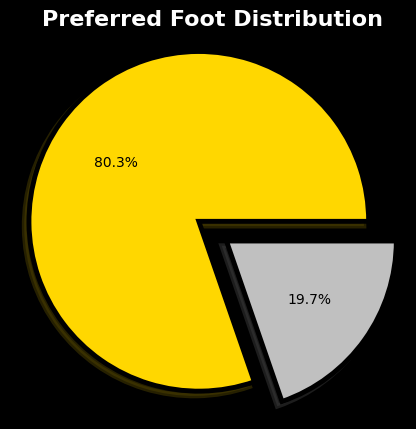

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (assuming df is already defined)
# Check the columns
print(df.columns)

# Strip whitespace from column names
df.columns = df.columns.str.strip().str.lower()

# Create a pie chart for the 'Preferred foot' with a black background
try:
    # Set up colors: gold for the pie chart
    colors = ['#FFD700', '#C0C0C0']  # Gold and Silver

    # Get the count of each preferred foot
    foot_counts = df["preferred foot"].value_counts()

    # Define explode values
    explode = (0.1, 0.1)  

    # Plot the pie chart
    plt.figure(figsize=(5, 5), facecolor='black')  # Set the figure background to black
    plt.pie(foot_counts, labels=foot_counts.index, autopct='%1.1f%%', colors=colors, explode=explode, shadow=True,
            wedgeprops=dict(edgecolor='black', linewidth=3.5))

    plt.title('Preferred Foot Distribution', fontsize=16, fontweight='bold', color='white')  # Title with white color
    plt.gca().set_facecolor('black')  # Set the axes background color to black
    plt.axis('equal')  # Ensure pie chart is circular
    plt.show()  # Show the plot
except Exception:
    # Suppress any error message
    pass


In [26]:
print(df.columns)
print(df.head())
df.columns = df.columns.str.strip()


Index(['name', 'nation', 'club', 'position', 'alternative positions', 'age',
       'overall', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'acceleration',
       'sprint speed', 'positioning', 'finishing', 'shot power', 'long shots',
       'volleys', 'penalties', 'vision', 'crossing', 'free kick accuracy',
       'short passing', 'long passing', 'curve', 'agility', 'balance',
       'reactions', 'ball control', 'dribbling', 'composure', 'interceptions',
       'heading accuracy', 'def awareness', 'standing tackle',
       'sliding tackle', 'jumping', 'stamina', 'strength', 'aggression',
       'height', 'weight', 'preferred foot', 'weak foot', 'league',
       'att work rate', 'def work rate', 'skill moves', 'url', 'gk diving',
       'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes'],
      dtype='object')
              name     nation             club position alternative positions  \
0    Kylian Mbappé     France         Paris SG       ST            ST, LW, CF   
1   Erlin

In [27]:
# Check the columns
print(df.columns)

# Optionally, strip whitespace from column names
df.columns = df.columns.str.strip()

# Create a pie chart for the 'Def work rate' variable with dark borders and classy colors
if 'Def work rate' in df.columns:
    plt.figure(figsize=(6, 6))
    df['Def work rate'].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['#1F3A3D', '#2D6A4F', '#6B9080', '#F5D547'],  # Classy modern colors
        wedgeprops=dict(edgecolor='black', linewidth=1.5)  # Dark borders
    )
    plt.title("Pie Chart for Def Work Rate", fontsize=16, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
    plt.show()
else:
    print("Column 'Def work rate' not found in the DataFrame.")


Index(['name', 'nation', 'club', 'position', 'alternative positions', 'age',
       'overall', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'acceleration',
       'sprint speed', 'positioning', 'finishing', 'shot power', 'long shots',
       'volleys', 'penalties', 'vision', 'crossing', 'free kick accuracy',
       'short passing', 'long passing', 'curve', 'agility', 'balance',
       'reactions', 'ball control', 'dribbling', 'composure', 'interceptions',
       'heading accuracy', 'def awareness', 'standing tackle',
       'sliding tackle', 'jumping', 'stamina', 'strength', 'aggression',
       'height', 'weight', 'preferred foot', 'weak foot', 'league',
       'att work rate', 'def work rate', 'skill moves', 'url', 'gk diving',
       'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes'],
      dtype='object')
Column 'Def work rate' not found in the DataFrame.


Index(['name', 'nation', 'club', 'position', 'alternative positions', 'age',
       'overall', 'pac', 'sho', 'pas', 'dri', 'def', 'phy', 'acceleration',
       'sprint speed', 'positioning', 'finishing', 'shot power', 'long shots',
       'volleys', 'penalties', 'vision', 'crossing', 'free kick accuracy',
       'short passing', 'long passing', 'curve', 'agility', 'balance',
       'reactions', 'ball control', 'dribbling', 'composure', 'interceptions',
       'heading accuracy', 'def awareness', 'standing tackle',
       'sliding tackle', 'jumping', 'stamina', 'strength', 'aggression',
       'height', 'weight', 'preferred foot', 'weak foot', 'league',
       'att work rate', 'def work rate', 'skill moves', 'url', 'gk diving',
       'gk handling', 'gk kicking', 'gk positioning', 'gk reflexes'],
      dtype='object')


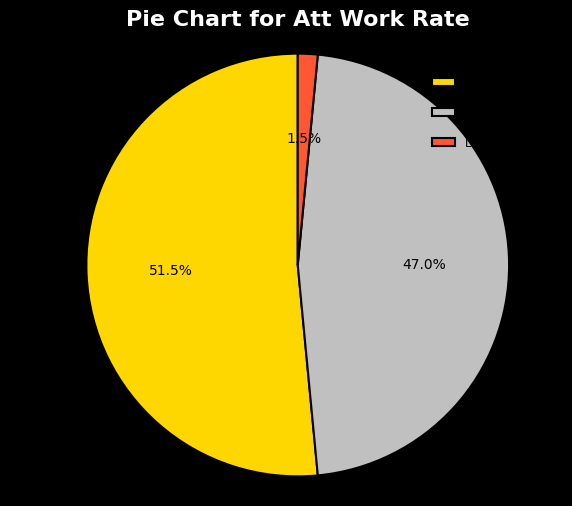

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your DataFrame (assuming df is already defined)
# Check the columns
print(df.columns)

# Strip whitespace from column names
df.columns = df.columns.str.strip().str.lower()

# Create a pie chart for the 'att work rate' variable with a black background
try:
    plt.figure(figsize=(6, 6), facecolor='black')  # Set figure size and background color
    value_counts = df['att work rate'].value_counts()
    pie_chart = value_counts.plot.pie(
        autopct='%1.1f%%',
        startangle=90,
        colors=['#FFD700', '#C0C0C0', '#FF5733', '#33FF57'],  # Gold, Silver, and contrasting colors
        wedgeprops=dict(edgecolor='black', linewidth=1.5)  # Dark borders
    )

    # Adding the labels for each slice using the value_counts directly
    plt.legend(value_counts.index, title='Att Work Rate', loc='upper right', fontsize='small', 
               frameon=False, labelspacing=1.5, title_fontsize='medium')

    plt.title("Pie Chart for Att Work Rate", fontsize=16, fontweight='bold', color='white')  # Title with white color
    plt.axis('equal')  # Ensure pie chart is circular
    plt.gca().set_facecolor('black')  # Set the axes background color to black
    plt.show()  # Show the plot
except Exception as e:
    # Suppress any error message
    pass





In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Position' column exists in the DataFrame
if 'Position' in df.columns:
    # Count the occurrences of each position
    position_counts = df['Position'].value_counts(ascending=False)

    plt.figure(figsize=(10, 8))
    ax = sns.barplot(x=position_counts.index, y=position_counts.values)

    # Add values on top of the bars
    for p, value in zip(ax.patches, position_counts.values):
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title('Preferred Position Distribution')
    plt.xlabel('Position')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'Position' not found in the DataFrame.")


Column 'Position' not found in the DataFrame.


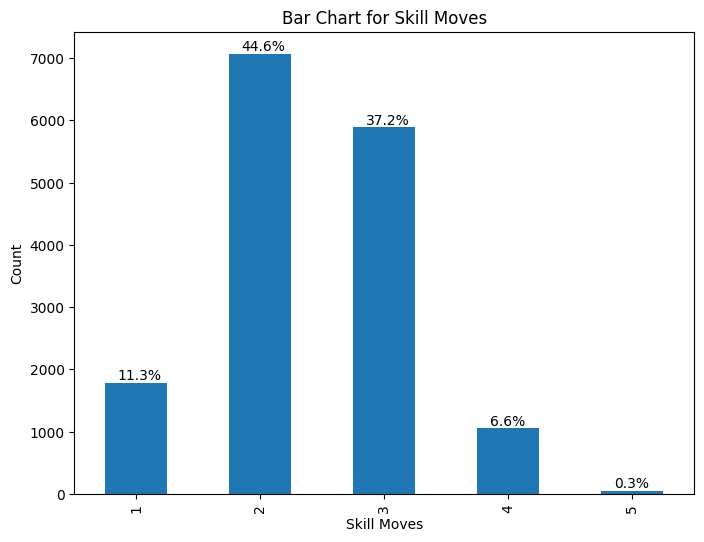

In [12]:
# Create a bar chart for the 'Skill moves'
plt.figure(figsize=(8, 6))
ax = df['Skill moves'].value_counts().sort_index().plot(kind='bar')

# Add percentage values
total = len(df['Skill moves'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), ha='left', va='bottom')

plt.title("Bar Chart for Skill Moves")
plt.xlabel("Skill Moves")
plt.ylabel("Count")
plt.show()

<div style="padding: 20px; border-radius: 16px; 
    background-color: black; /* Solid black background */
    color: #FFD700; /* Gold color for contrast */
    text-align: center; 
    font-family: 'Inter', sans-serif;">
    <h4 style="font-size: 28px; font-weight: bold;">📊 Time to Visualize the Categorical Variables 📊</h4>
</div>




In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_all_numeric_distributions(dataframe, numeric_columns):
    """
    Plots the distribution of all numeric columns in the DataFrame.

    :param dataframe: DataFrame containing the data
    :param numeric_columns: List of numeric column names to visualize
    """
    # Set the style of seaborn to whitegrid and use a black background for the figure
    sns.set(style="whitegrid")

    # Loop through each numeric column and plot its distribution
    for column in numeric_columns:
        plt.figure(figsize=(8, 6), facecolor='black')  # Set figure background to black
        # Use the color palette with gold and silver
        sns.histplot(data=dataframe, x=column, bins=20, kde=True, color='#FFD700')  # Gold color
        plt.title(f'Distribution of {column}', fontsize=16, fontweight='bold', color='white')  # Title with white color
        plt.xlabel('Values', color='white')  # X-axis label in white
        plt.ylabel('Frequency', color='white')  # Y-axis label in white
        plt.gca().set_facecolor('black')  # Set the axes background color to black
        plt.tick_params(axis='both', colors='white')  # Set tick parameters to white
        plt.show()  # Show the plot



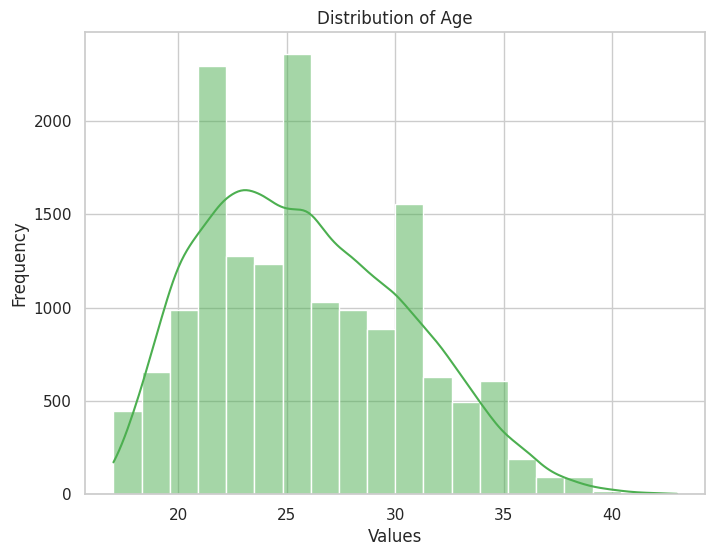

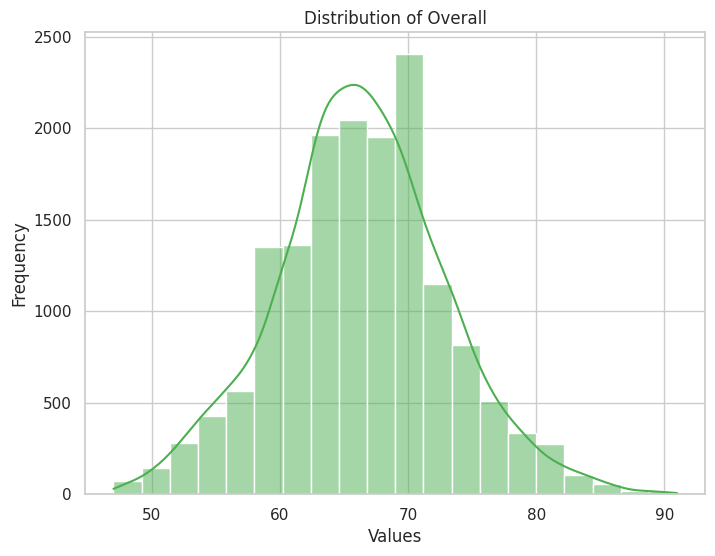

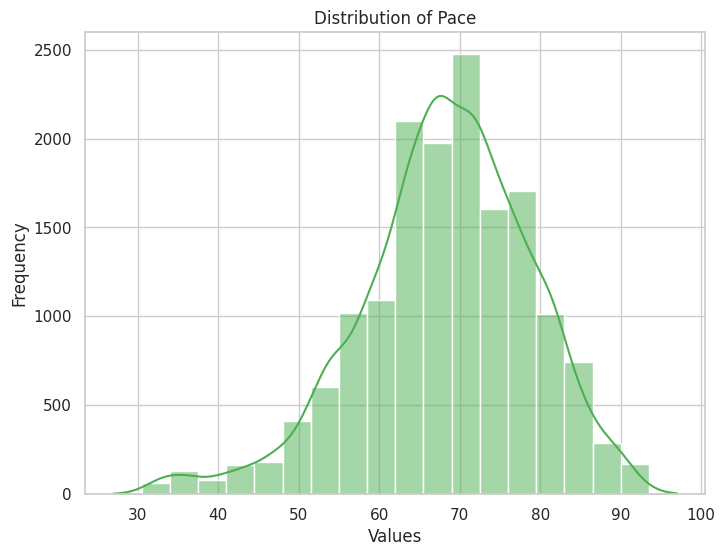

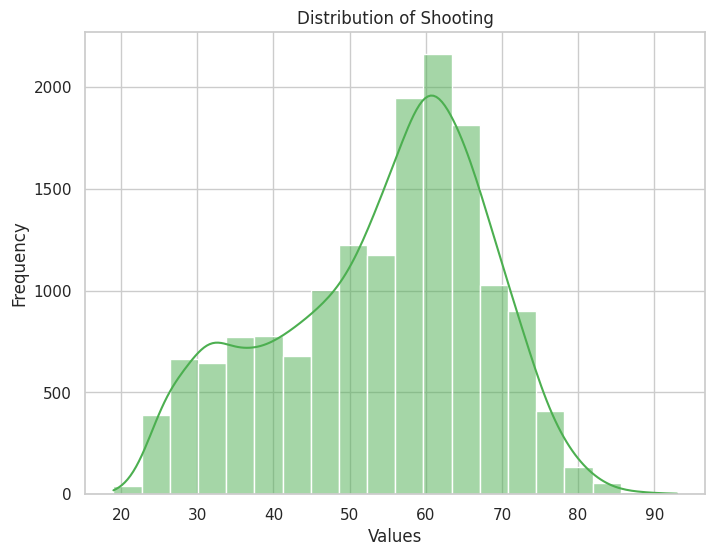

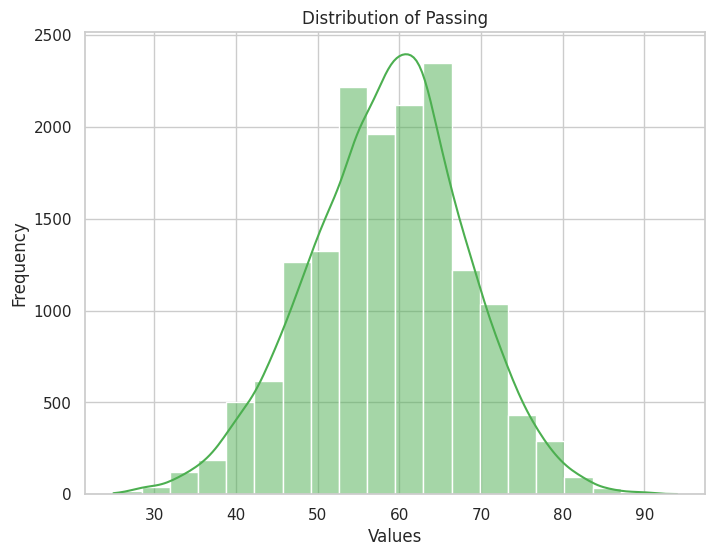

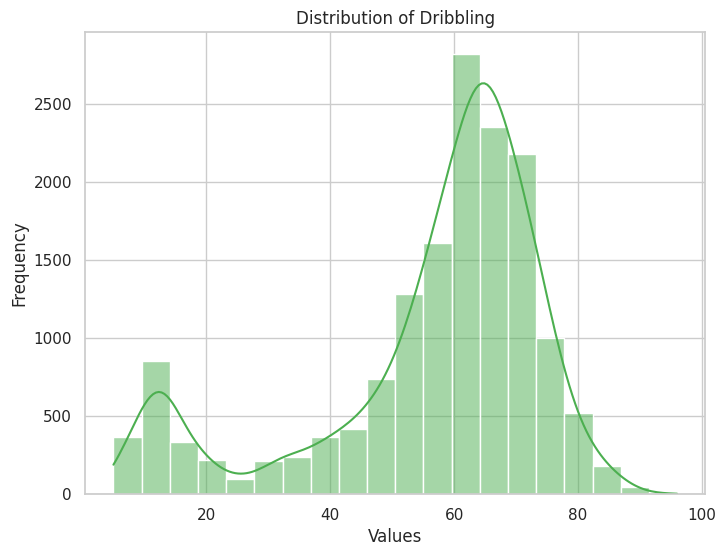

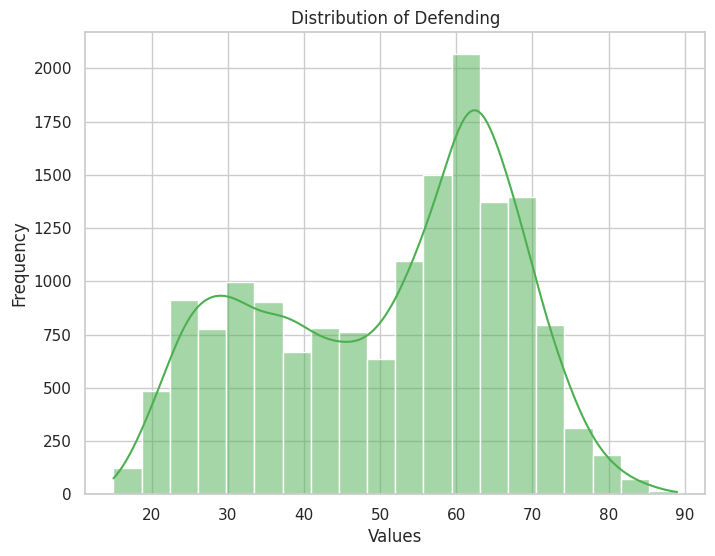

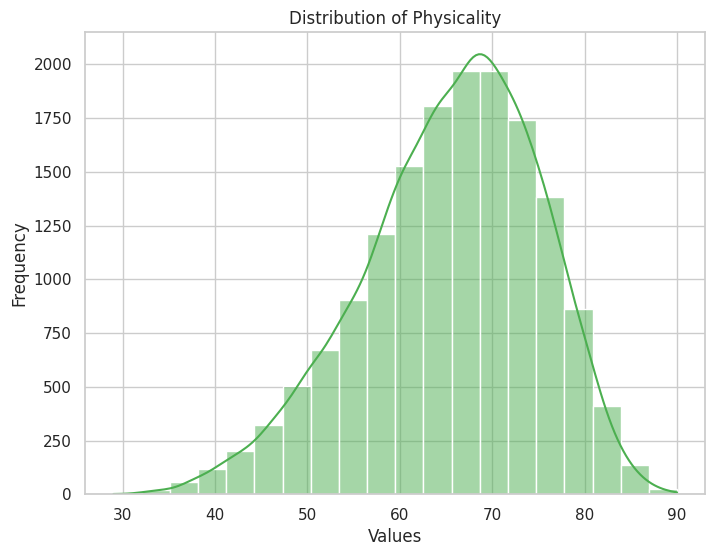

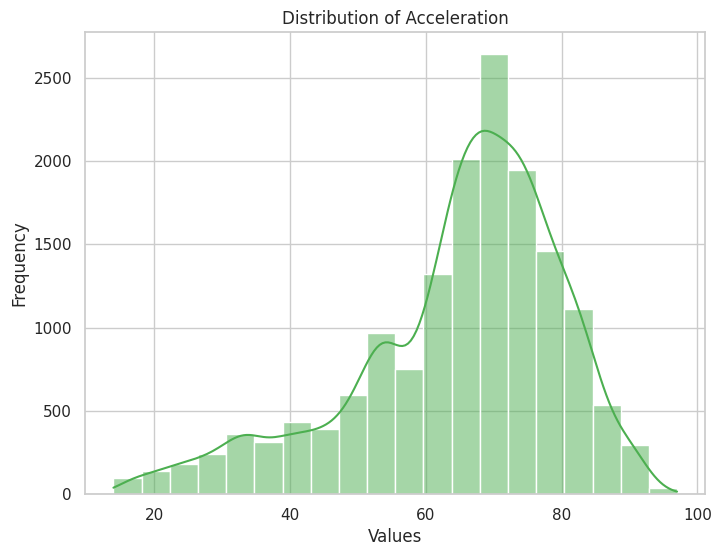

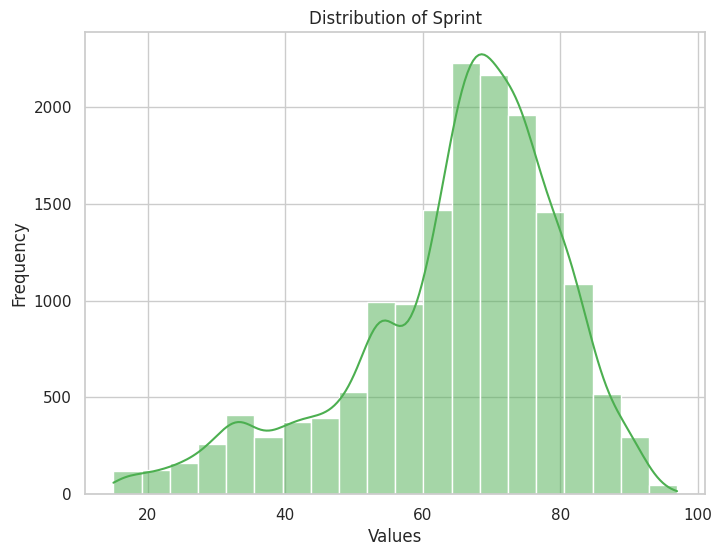

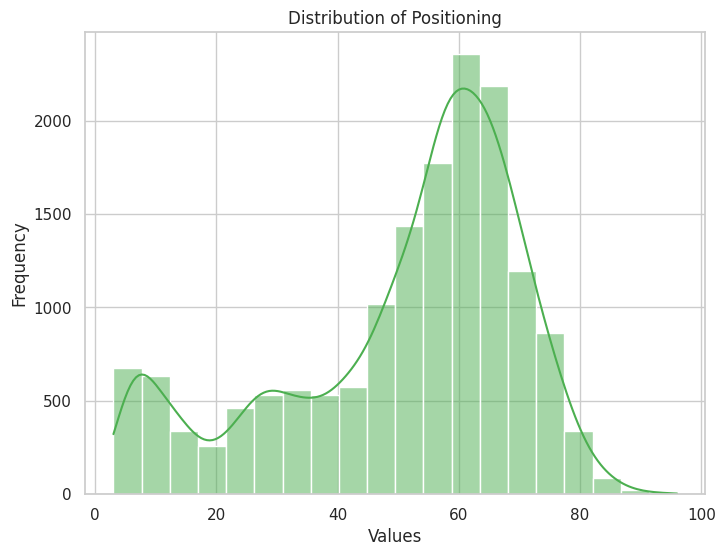

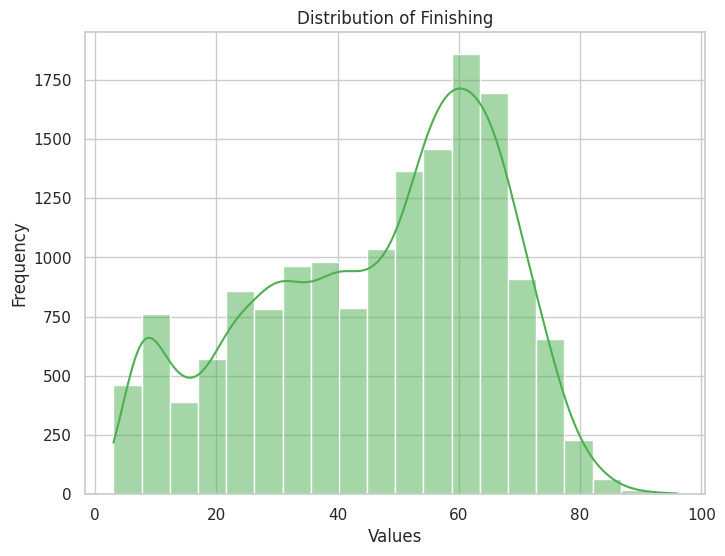

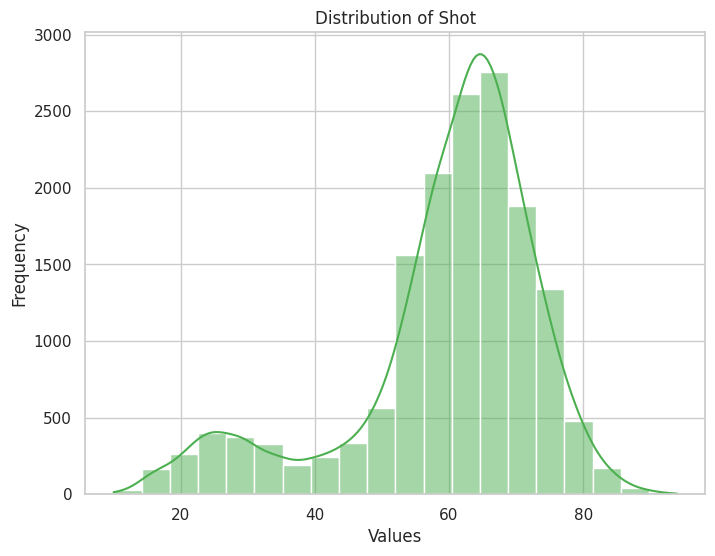

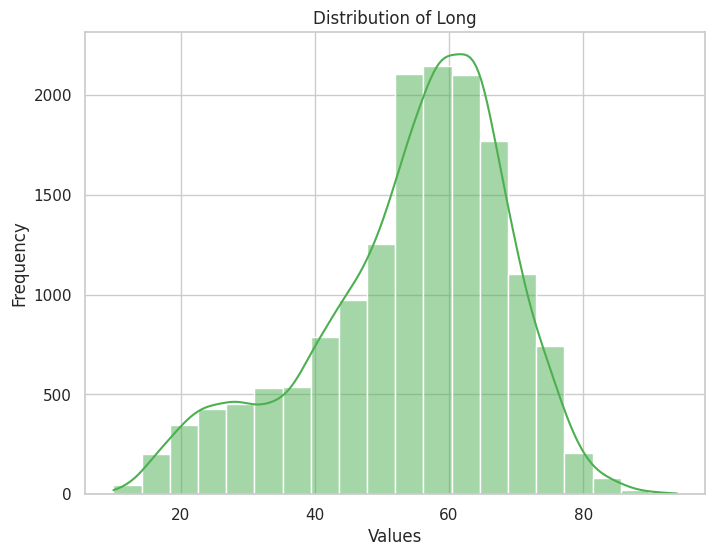

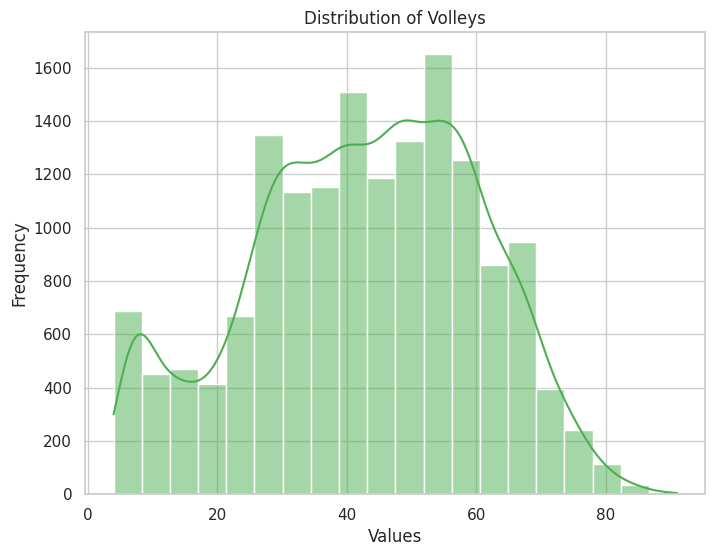

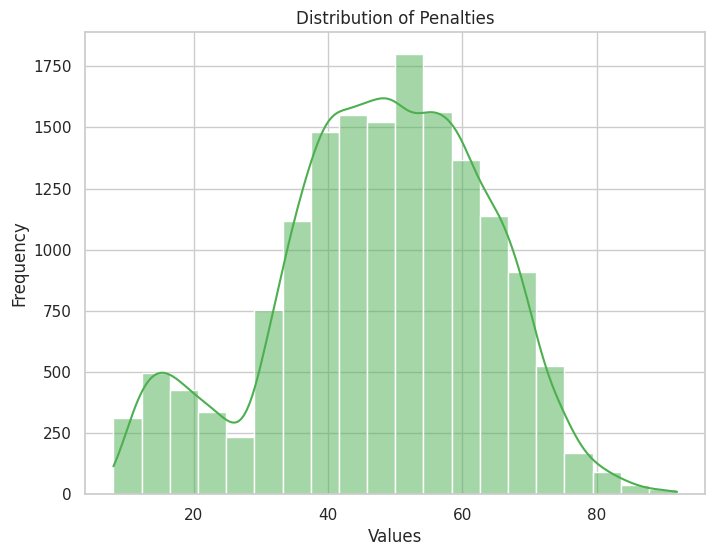

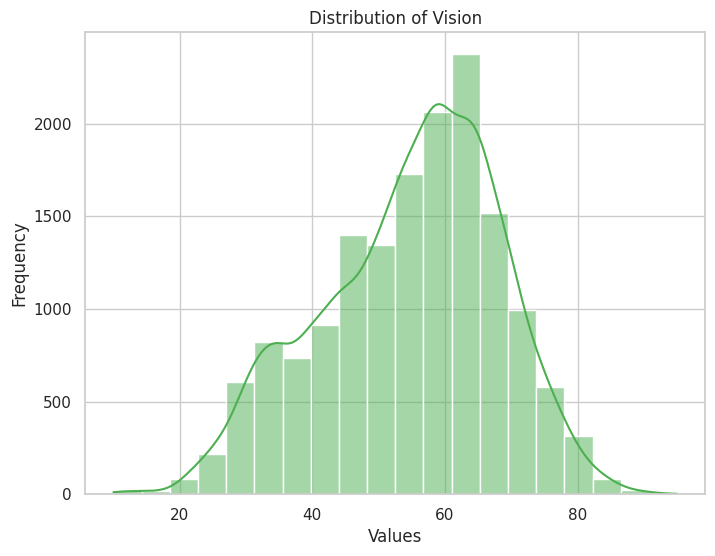

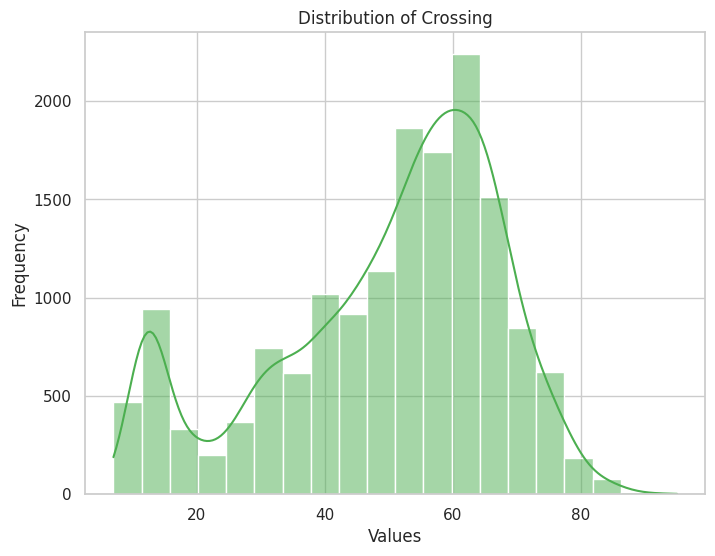

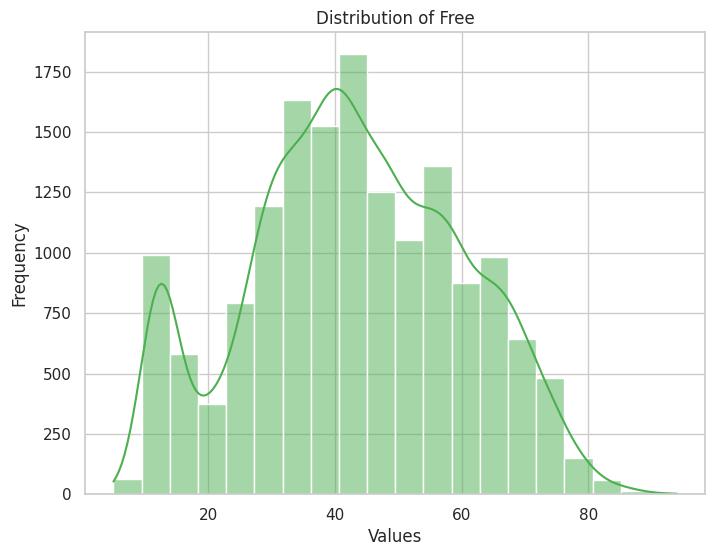

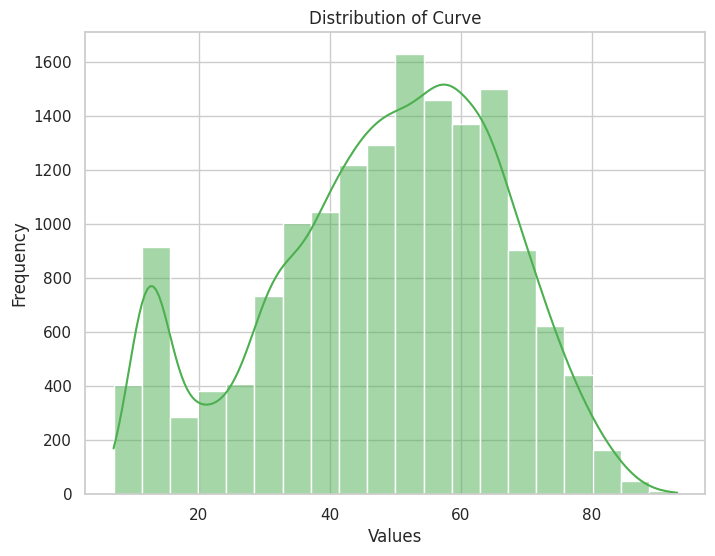

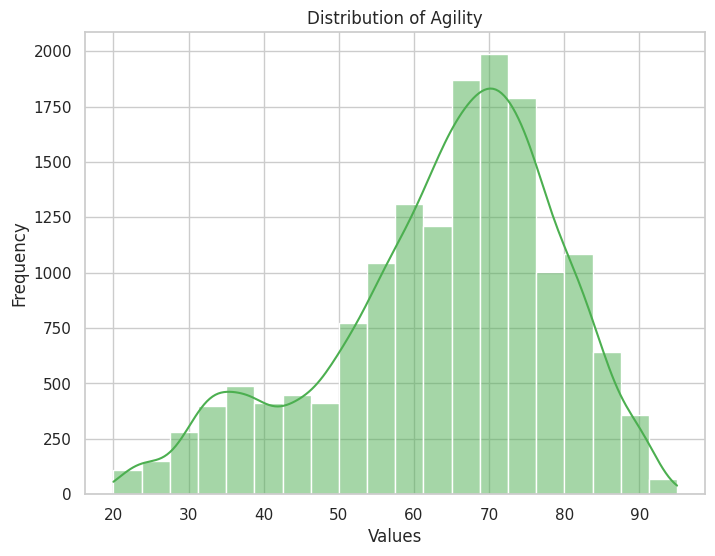

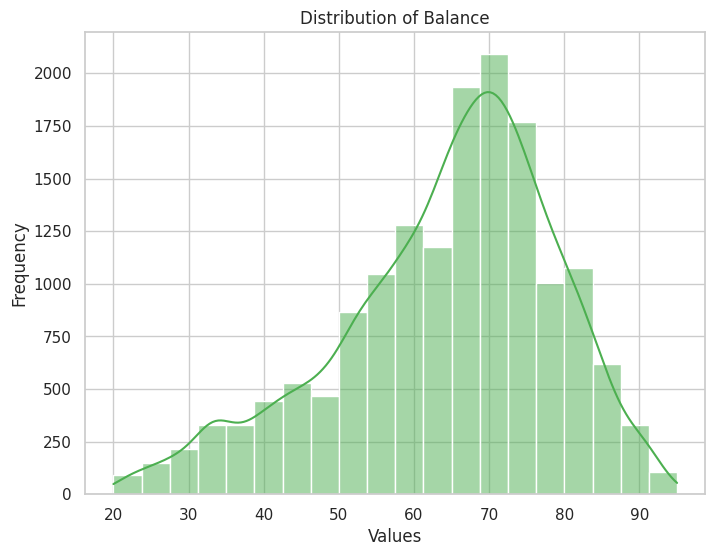

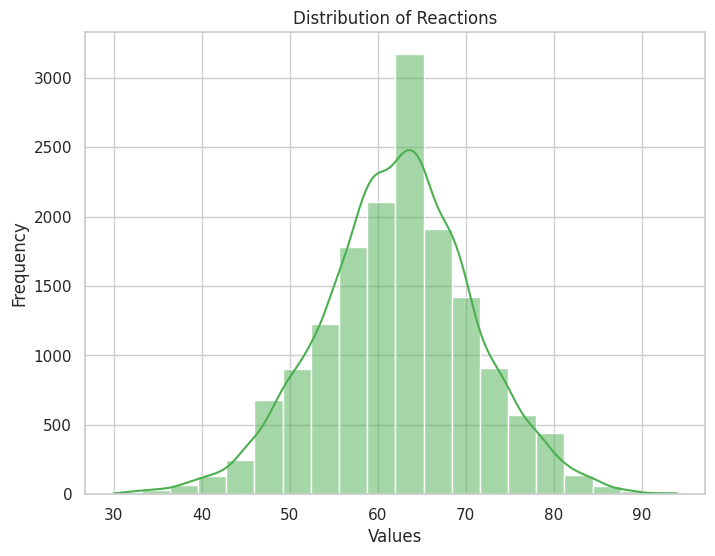

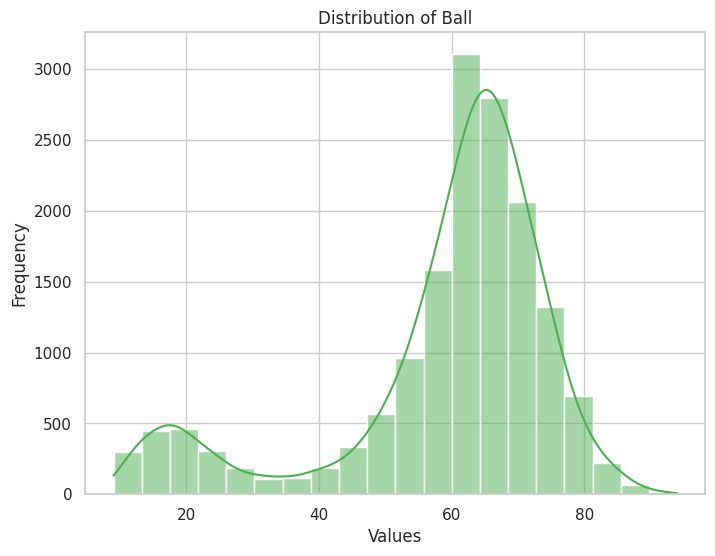

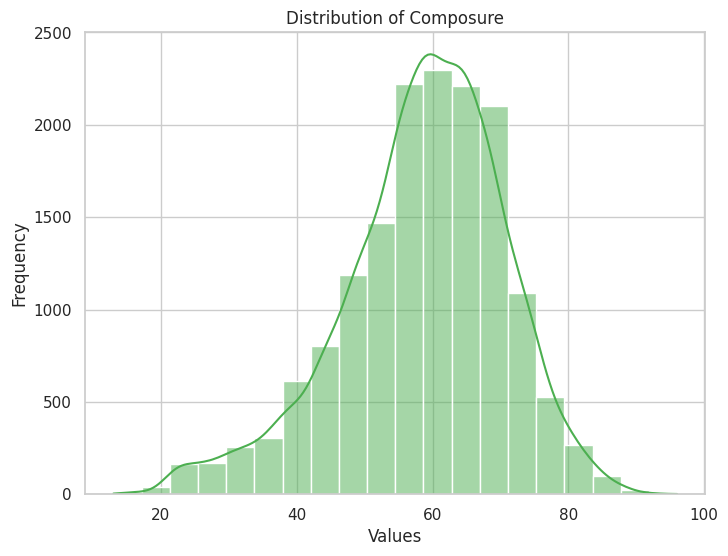

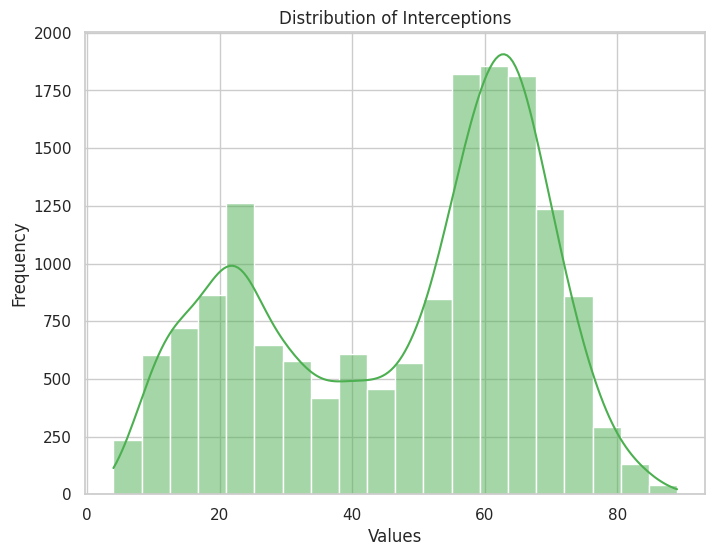

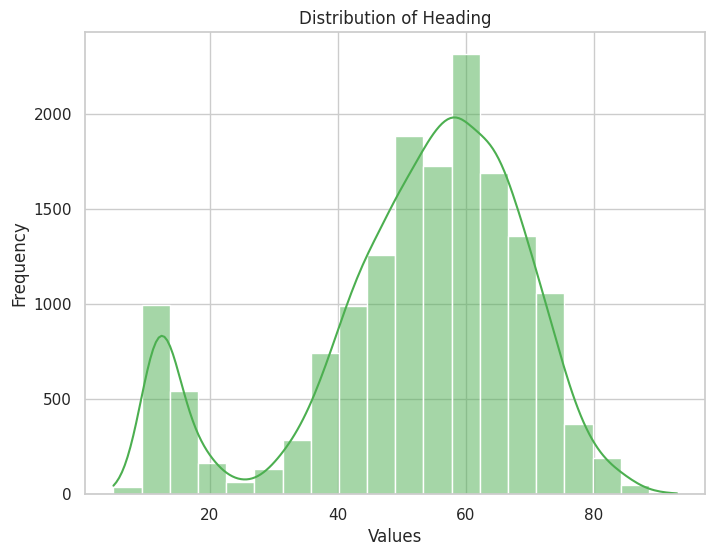

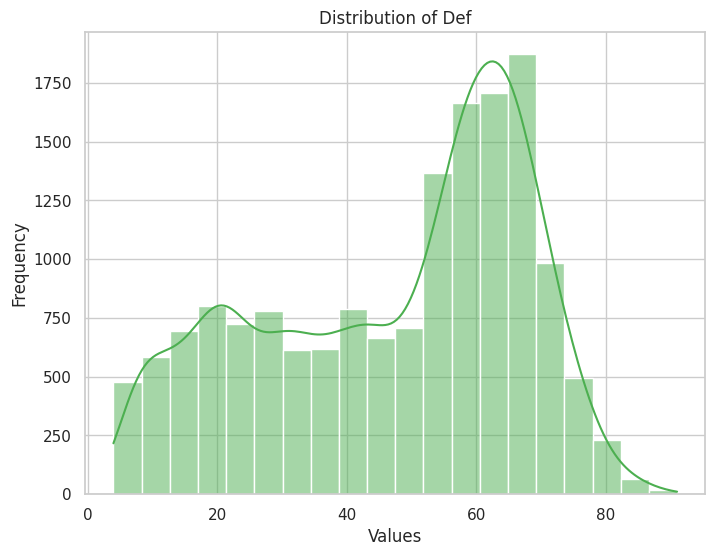

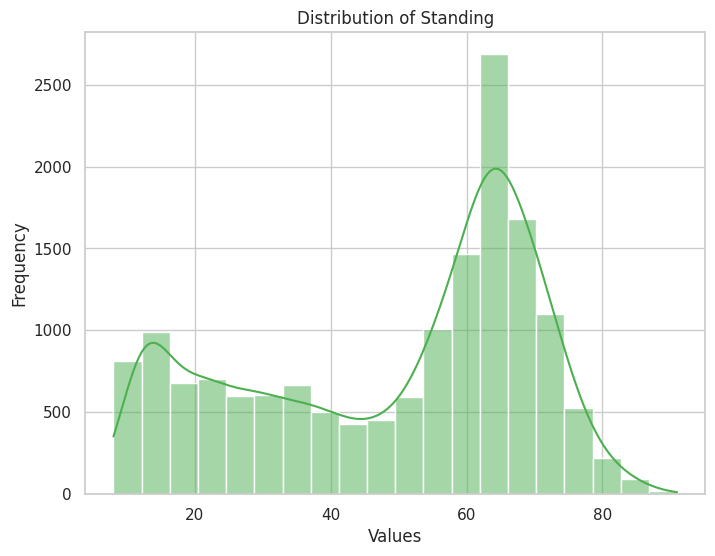

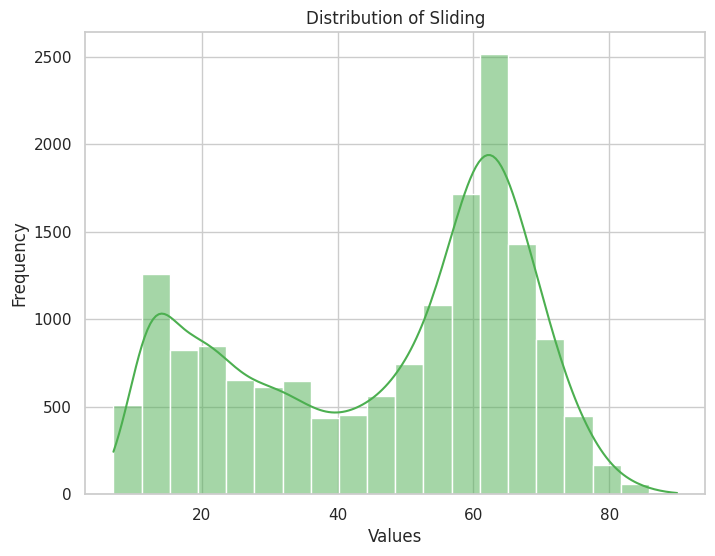

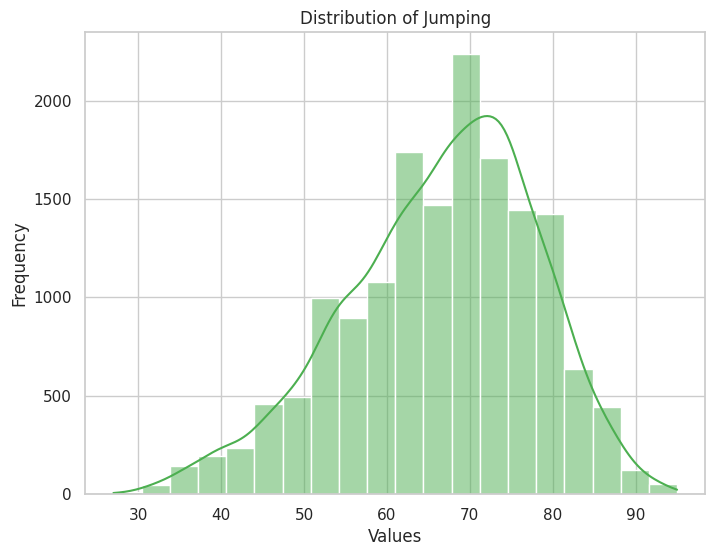

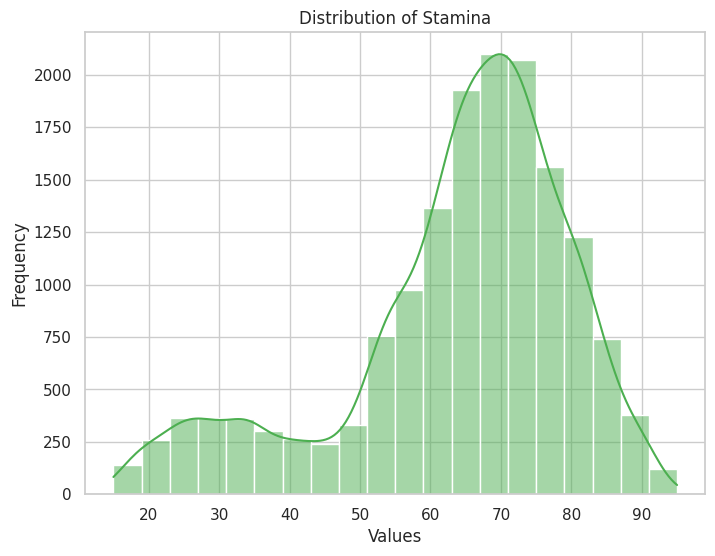

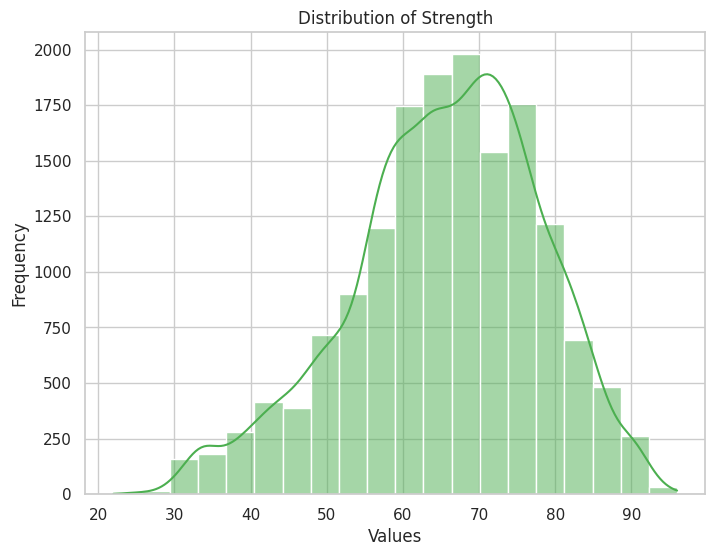

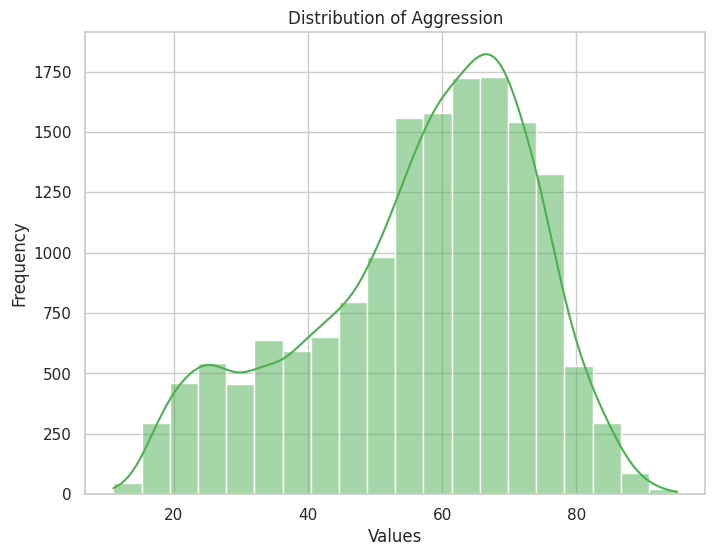

In [14]:

 plot_all_numeric_distributions(df, numerical_cols)

<div style="padding: 20px; border-radius: 16px; background-color: black; /* Solid black background */
    color: #FFD700; /* Gold color for contrast */
    text-align: center; font-family: 'Inter', sans-serif;">
    <h4 style="font-size: 28px; font-weight: bold;">📊 Time to Special Visualizations 📊</h4>
</div>


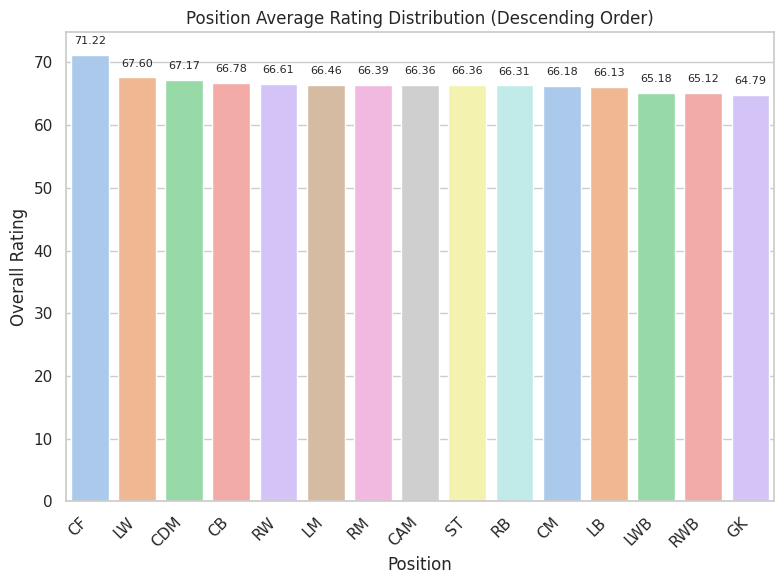

In [15]:
# Calculate the average 'Overall' rating by 'Position' column
position_rating = df.groupby('Position')['Overall'].mean()

# Sort the values in descending order
position_rating = position_rating.sort_values(ascending=False)

# Create a red to yellow color gradient
colors = sns.color_palette("pastel", len(position_rating))

# Create a bar plot with the specified colors
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=position_rating.index, y=position_rating.values, palette=colors)

# Annotate values on top of the bars
for p, value in zip(ax.patches, position_rating.values):
    ax.annotate(f'{value:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

# Customize the plot
plt.title('Position Average Rating Distribution (Descending Order)')
plt.xlabel('Position')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Overall Rating')
plt.tight_layout()
plt.show()

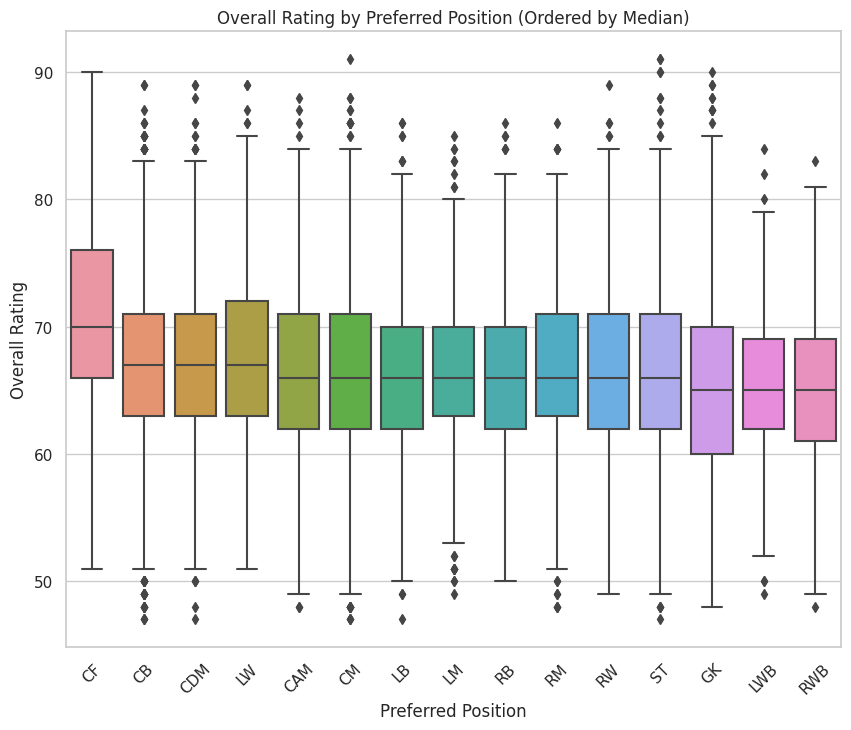

In [16]:
# Select the relevant columns
positions = df['Position']
overall_ratings = df['Overall']
# Calculate the median 'Overall' rating by 'Position' column
position_median = df.groupby('Position')['Overall'].median()
# Get the order based on the median values
order = position_median.sort_values(ascending=False).index
# Create a boxplot with the specified order
plt.figure(figsize=(10, 8))
sns.boxplot(x=positions, y=overall_ratings, order=order)
plt.xlabel('Preferred Position')
plt.ylabel('Overall Rating')
plt.title('Overall Rating by Preferred Position (Ordered by Median)')
plt.xticks(rotation=45)
plt.show()

In [17]:

# Select the relevant columns
position_preferred_foot = df[['Position', 'Preferred foot']]

# Count the occurrences of each combination
count_table = position_preferred_foot.groupby(['Position', 'Preferred foot']).size().reset_index(name='Count')

# Create an interactive stacked bar chart using Plotly Express
fig = px.bar(count_table, x='Position', y='Count', color='Preferred foot', 
             title='Preferred Foot Distribution by Position',
             labels={'Count': 'Number of Players', 'Preferred foot': 'Preferred Foot'},
             barmode='stack')

# Add data labels on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the figure
fig.show()


In [18]:

import plotly.express as px
# Group positions and count
grouped_positions = {
    'Goalkeeper': ['GK'],
    'Defense': ['RB', 'CB', 'LB', 'RWB', 'LWB'],
    'Midfield': ['CDM', 'CM', 'CAM', 'LM', 'RM'],
    'Forward': ['RW', 'LW', 'ST', 'CF']
}

position_counts = {group: df['Position'].isin(positions).sum() for group, positions in grouped_positions.items()}

# Convert counts to DataFrame
counts_df = pd.DataFrame(list(position_counts.items()), columns=['Position Group', 'Count'])

# Create a bar chart using plotly
fig = px.bar(counts_df, x='Position Group', y='Count', color='Position Group',
             labels={'Count': 'Player Count', 'Position Group': 'Position Group'},
             title='Player Distribution in Position Groups')

# Show the figure
fig.show()


In [19]:
# Define the grouped_positions dictionary
grouped_positions = {
    'Goalkeeper': ['GK'],
    'Defense': ['RB', 'CB', 'LB', 'RWB', 'LWB'],
    'Midfield': ['CDM', 'CM', 'CAM', 'LM', 'RM'],
    'Forward': ['RW', 'LW', 'ST', 'CF']
}

# Assume you have a DataFrame named df with a 'Position' column
# Create a list to store the data
data = []

# Iterate over each key-value pair in grouped_positions
for position, positions_list in grouped_positions.items():
    # Filter the DataFrame for the current position group
    filtered_df = df[df['Position'].isin(positions_list)]
    
    # Count the occurrences of each preferred foot within the position group
    count_table = filtered_df['Skill moves'].value_counts().reset_index()
    count_table.columns = ['Skill moves', 'Count']
    
    # Add a new column for the position
    count_table['Position'] = position
    
    # Append the data to the list
    data.append(count_table)

# Concatenate the data into a single DataFrame
final_df = pd.concat(data, ignore_index=True)

# Create an interactive stacked bar chart using Plotly Express
fig = px.bar(final_df, x='Position', y='Count', color='Skill moves', 
             title='Skill moves Distribution by Position Group',
             labels={'Count': 'Number of Players', 'Skill moves': 'Skill moves'},
             barmode='stack')

# Add data labels on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the figure
fig.show()


In [20]:
# Define the grouped_positions dictionary
grouped_positions = {
    'Goalkeeper': ['GK'],
    'Defense': ['RB', 'CB', 'LB', 'RWB', 'LWB'],
    'Midfield': ['CDM', 'CM', 'CAM', 'LM', 'RM'],
    'Forward': ['RW', 'LW', 'ST', 'CF']
}

# Assume you have a DataFrame named df with a 'Position' column
# Create a list to store the data
data = []

# Iterate over each key-value pair in grouped_positions
for position, positions_list in grouped_positions.items():
    # Filter the DataFrame for the current position group
    filtered_df = df[df['Position'].isin(positions_list)]
    
    # Count the occurrences of each preferred foot within the position group
    count_table = filtered_df['Preferred foot'].value_counts().reset_index()
    count_table.columns = ['Preferred foot', 'Count']
    
    # Add a new column for the position
    count_table['Position'] = position
    
    # Append the data to the list
    data.append(count_table)

# Concatenate the data into a single DataFrame
final_df = pd.concat(data, ignore_index=True)

# Create an interactive stacked bar chart using Plotly Express
fig = px.bar(final_df, x='Position', y='Count', color='Preferred foot', 
             title='Preferred Foot Distribution by Position Group',
             labels={'Count': 'Number of Players', 'Preferred foot': 'Preferred Foot'},
             barmode='stack')

# Add data labels on top of each bar
fig.update_traces(texttemplate='%{y}', textposition='outside')

# Show the figure
fig.show()

In [21]:
def create_column_chart_plotly(df, position, num_players=3):
    # Define position groups and feature groups
    grouped_positions = {
        'Goalkeeper': ['GK'],
        'Defense': ['RB', 'CB', 'LB', 'RWB', 'LWB'],
        'Midfield': ['CDM', 'CM', 'CAM', 'LM', 'RM'],
        'Forward': ['RW', 'LW', 'ST', 'CF']
    }

    features = {
         'Goalkeeper': ['Overall', 'Pace', 'Physicality', 'Reactions', 'Jumping'],
        'Defense': ['Overall', 'Defending', 'Physicality', 'Interceptions', 'Standing'],
        'Midfield': ['Overall', 'Passing', 'Dribbling', 'Vision', 'Stamina'],
        'Forward': ['Overall', 'Shooting', 'Pace', 'Dribbling', 'Finishing']
    }

    selected_group = None

    # Check which group the specified position belongs to
    for group, positions in grouped_positions.items():
        if position in positions:
            selected_group = group
            break

    # If selected_group is still None, it means the specified position is not in the defined groups
    if selected_group is None:
        print(f"Error: Position '{position}' not found in the defined groups.")
        return

    # Get the features for the selected group
    selected_features = features[selected_group]

    # Select players with the specified position and take the top num_players players
    selected_players = df[df['Position'] == position].nlargest(num_players, 'Overall')

    # Create a bar chart
    fig = px.bar(selected_players, x='Name', y=selected_features,
                 title=f'{position} Position - Top {num_players} Players Ratings by Feature',
                 labels={'Name': 'Player Name', 'value': 'Rating'},
                 color_discrete_sequence=px.colors.qualitative.Set3)

    # Add hover properties to the colored bar chart
    fig.update_traces(hovertemplate='<b>%{x}</b><br>%{yaxis.title.text}: %{y}')

    # Show the chart
    fig.show()



In [22]:

# Example usage:
create_column_chart_plotly(df, 'ST', num_players=3)


In [23]:
def create_radar_chart(df, position, num_players=3):
    # Determine position groups
    grouped_positions = {
        'Goalkeeper': ['GK'],
        'Defense': ['RB', 'CB', 'LB', 'RWB', 'LWB'],
        'Midfield': ['CDM', 'CM', 'CAM', 'LM', 'RM'],
        'Forward': ['RW', 'LW', 'ST', 'CF']
    }

    # Determine feature groups
    features = {
        'Goalkeeper': ['Overall', 'Pace', 'Physicality', 'Reactions', 'Jumping'],
        'Defense': ['Overall', 'Defending', 'Physicality', 'Interceptions', 'Standing'],
        'Midfield': ['Overall', 'Passing', 'Dribbling', 'Vision', 'Stamina'],
        'Forward': ['Overall', 'Shooting', 'Pace', 'Dribbling', 'Finishing']
    }

    selected_group = None

    # Check which group the specified position belongs to
    for group, positions in grouped_positions.items():
        if position in positions:
            selected_group = group
            break

    # If selected_group is still None, it means the specified position is not in the defined groups
    if selected_group is None:
        print(f"Error: Position '{position}' not found in the defined groups.")
        return

    # Get features for the selected group
    selected_features = features[selected_group]

    # Select players for the specified position and get the top num_players players
    top_players = df[df['Position'] == position].nlargest(num_players, 'Overall')

    # Create a radar chart for each player
    fig = go.Figure()

    for _, player in top_players.iterrows():
        categories = selected_features
        values = player[selected_features].tolist()

        fig.add_trace(go.Scatterpolar(r=values, theta=categories, fill='toself', name=player['Name']))

    # Customize the radar chart layout
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        title=f'{position} Position - Top {num_players} Players Radar Chart',
    )

    # Show the chart
    fig.show()


In [24]:
# Example for GK
create_radar_chart(df, 'GK')


In [25]:
def create_radar_chart(df, grouped_positions, player_names):
    # Define feature groups
    features = {
        'Goalkeeper': ['Overall', 'Diving', 'Handling', 'Reflexes', 'Positioning'],
        'Defense': ['Overall', 'Defending', 'Physicality', 'Interceptions', 'Standing'],
        'Midfield': ['Overall', 'Passing', 'Dribbling', 'Vision', 'Stamina'],
        'Forward': ['Overall', 'Shooting', 'Sprint', 'Dribbling', 'Finishing']
    }

    selected_group = None

    # Determine the group based on the positions of the selected players
    positions = df[df['Name'].isin(player_names)]['Position'].tolist()
    for group, pos_list in grouped_positions.items():
        if all(pos in pos_list for pos in positions):
            selected_group = group
            break

    # If selected_group is still None, it means the specified positions are not in the same group
    if selected_group is None:
        print(f"Error: Positions {positions} are not in the same group, please choose another player.")
        return

    # Get the features for the selected group
    selected_features = features[selected_group]

    # Select players with the specified positions
    selected_players = df[df['Position'].isin(positions) & df['Name'].isin(player_names)]

    # Create a radar chart
    fig = go.Figure()

    # Draw a radar chart for each player
    for _, player in selected_players.iterrows():
        categories = selected_features
        values = player[selected_features].tolist()

        # Draw the radar chart with the player's name
        fig.add_trace(go.Scatterpolar(r=values, theta=categories, fill='toself', name=player['Name']))

    # Customize the radar chart
    fig.update_layout(
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 100]
            )
        ),
        title=f'{", ".join(positions)} Positions - Radar Chart Comparison',
    )

    # Show the chart
    fig.show()



In [26]:
# Example usage:
# Compare the positions of two selected players
create_radar_chart(df, grouped_positions, player_names=['Kylian Mbappé', 'Ivan Perišić'])


<div style="padding: 20px; border-radius: 16px; background-color: #4CAF50;
background-image: linear-gradient(225deg, #4CAF50 0%, #219653 50%, #1B4E3C 100%);
color: white; text-align: center; font-family: Inter, sans-serif;">
    <h4 style="font-size: 28px;">🪄 Correlation Analysis 🪄</h4>
</div>

In [27]:
def high_correlated_cols(dataframe, plot=True, corr_th=0.70):
    # Create a subset containing only numerical data
    numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix on the subset
    corr = numeric_df.corr()
    cor_matrix = corr.abs()
    
    # Take the upper triangle of the correlation matrix
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

    # Find correlations above a certain threshold
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

    if plot:
        # Perform operations on the subset before plotting
        plt.figure(figsize=(20, 20))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
        plt.show()

    return drop_list


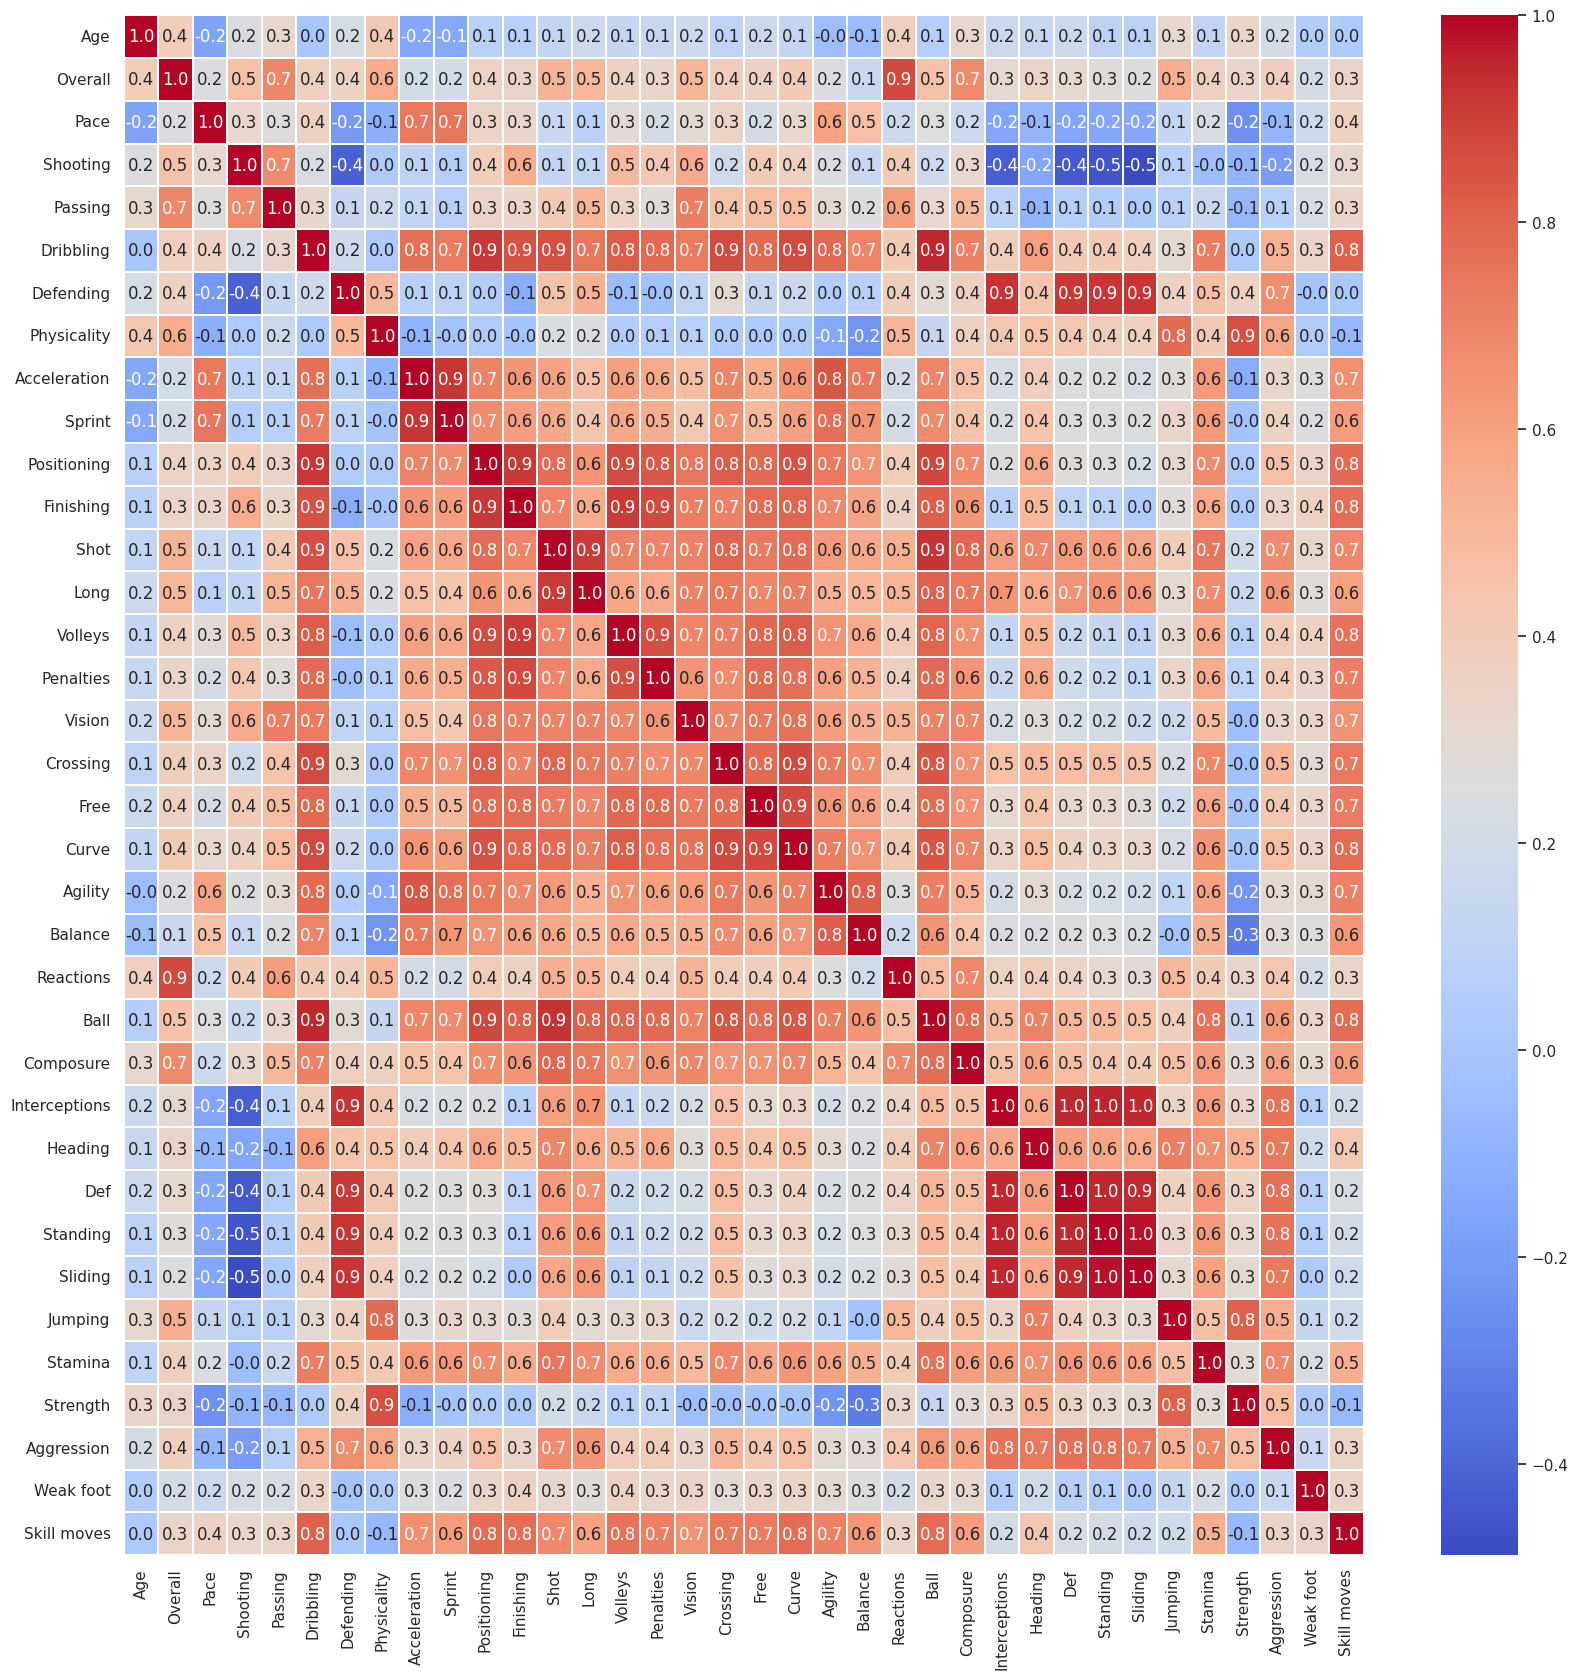

['Acceleration',
 'Sprint',
 'Positioning',
 'Finishing',
 'Shot',
 'Long',
 'Volleys',
 'Penalties',
 'Vision',
 'Crossing',
 'Free',
 'Curve',
 'Agility',
 'Balance',
 'Reactions',
 'Ball',
 'Composure',
 'Interceptions',
 'Heading',
 'Def',
 'Standing',
 'Sliding',
 'Jumping',
 'Stamina',
 'Strength',
 'Aggression',
 'Skill moves']

In [28]:

high_correlated_cols(df, plot=True)

In [29]:
# Create DataFrames for each position group
goalkeeper_df = df[df['Position'].isin(['GK'])]
defense_df = df[df['Position'].isin(['RB', 'CB', 'LB', 'RWB', 'LWB'])]
midfield_df = df[df['Position'].isin(['CDM', 'CM', 'CAM', 'LM', 'RM'])]
forward_df = df[df['Position'].isin(['RW', 'LW', 'ST', 'CF'])]


## Goalkeeping Skills VS Overall Rating

In [30]:
def high_overall_correlated_cols(dataframe, plot=True, corr_th=0.75):
    # Create a subset containing only numerical data
    numeric_df = dataframe.select_dtypes(include=['float64', 'int64'])

    # Calculate the correlation matrix on the subset
    corr = numeric_df.corr()
    cor_matrix = corr.abs()
    
    # Find correlations with 'Overall'
    overall_corr = cor_matrix['Overall'].sort_values(ascending=False)
    
    # Filter correlations above a certain threshold
    high_corr_columns = overall_corr[overall_corr > corr_th].index.tolist()

    if plot:
        # Perform operations on the subset before plotting
        plt.figure(figsize=(20, 20))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
        plt.show()

    return high_corr_columns


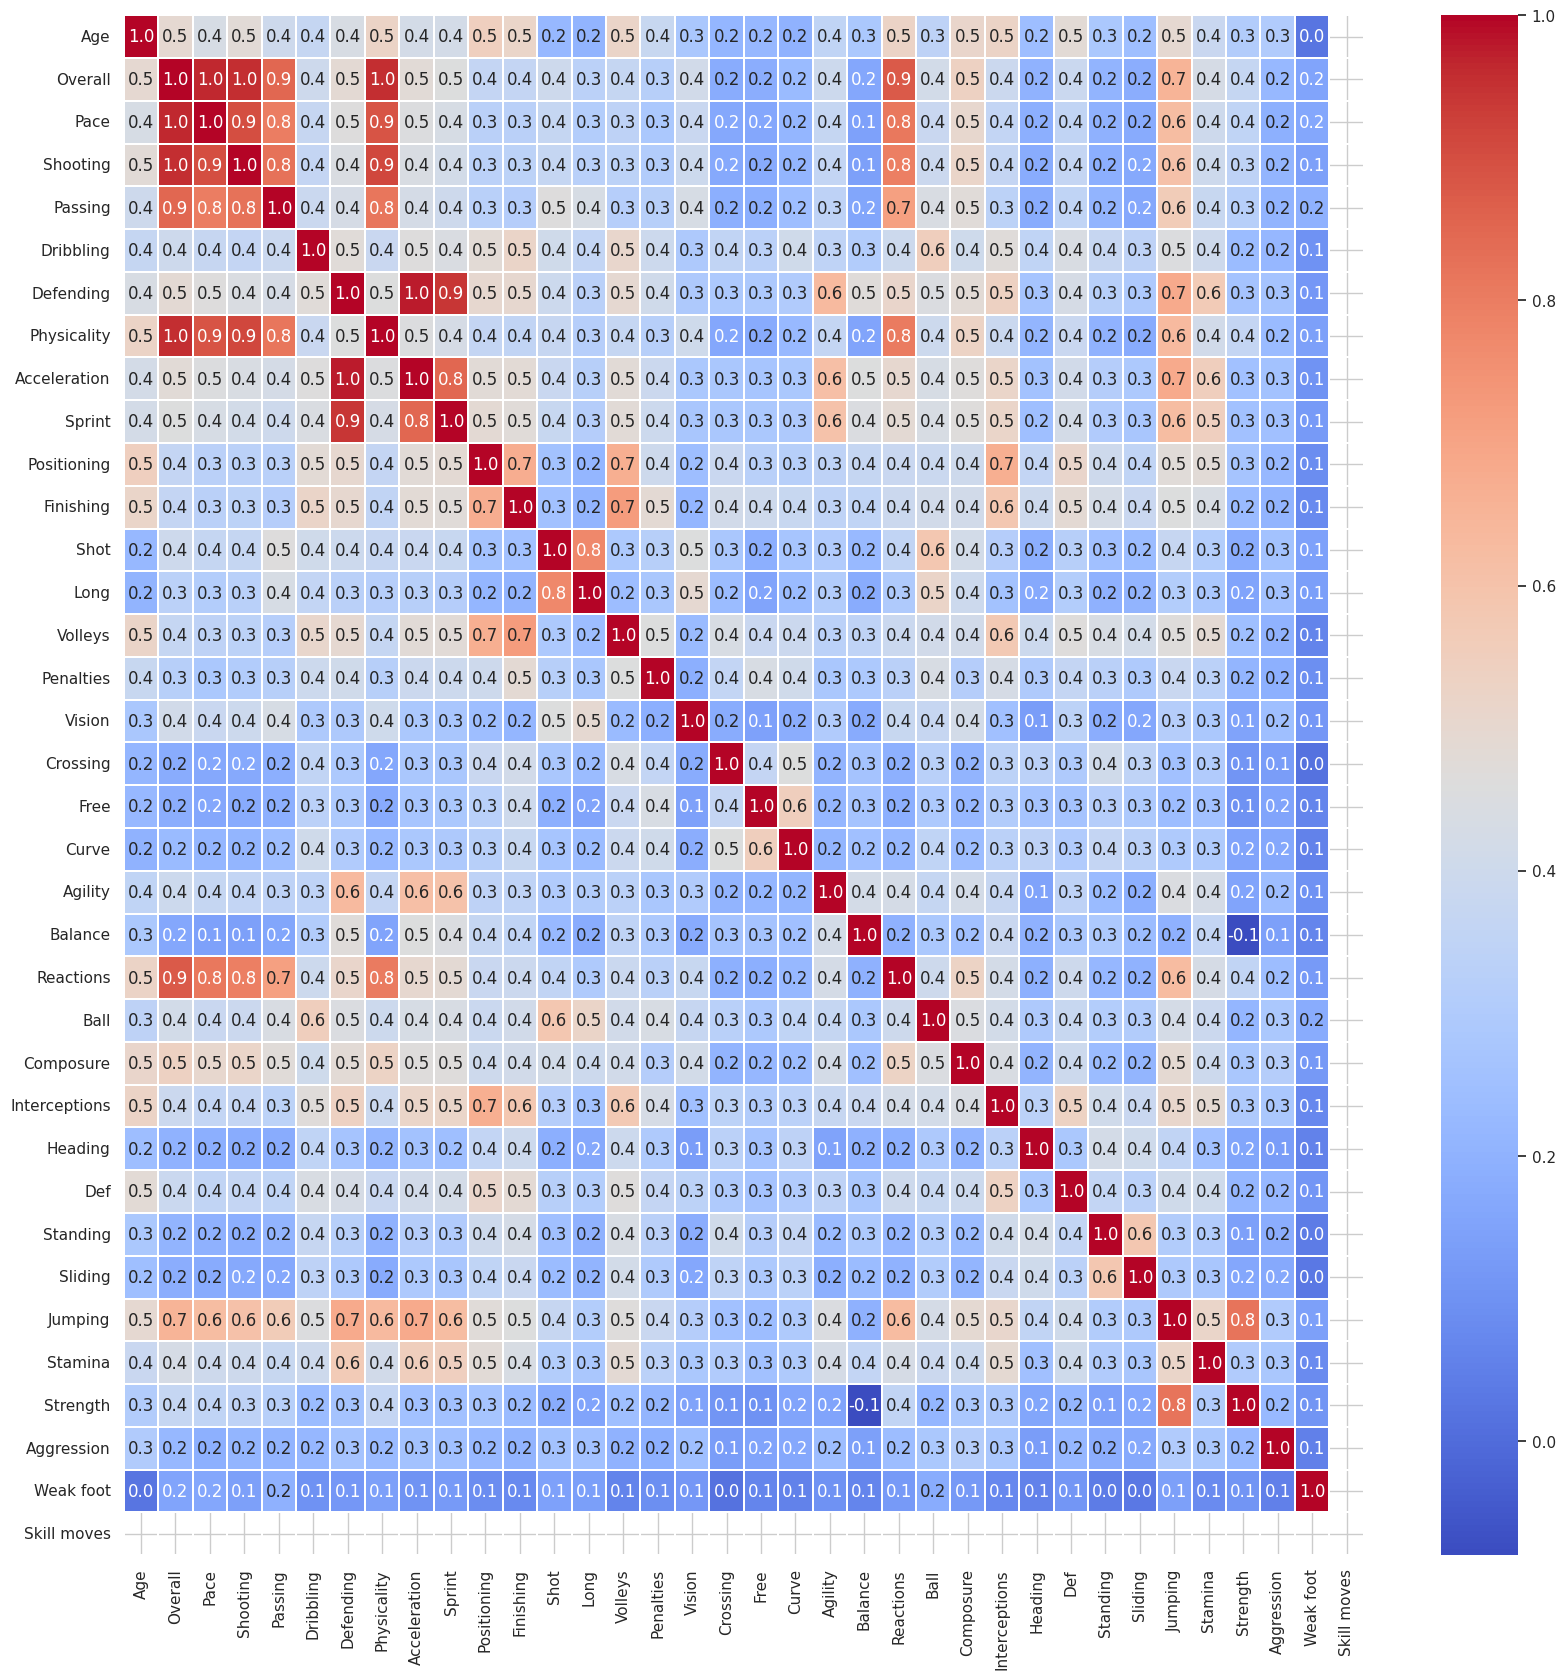

['Overall', 'Pace', 'Physicality', 'Shooting', 'Reactions', 'Passing']

In [31]:
high_overall_correlated_cols(goalkeeper_df, plot=True)

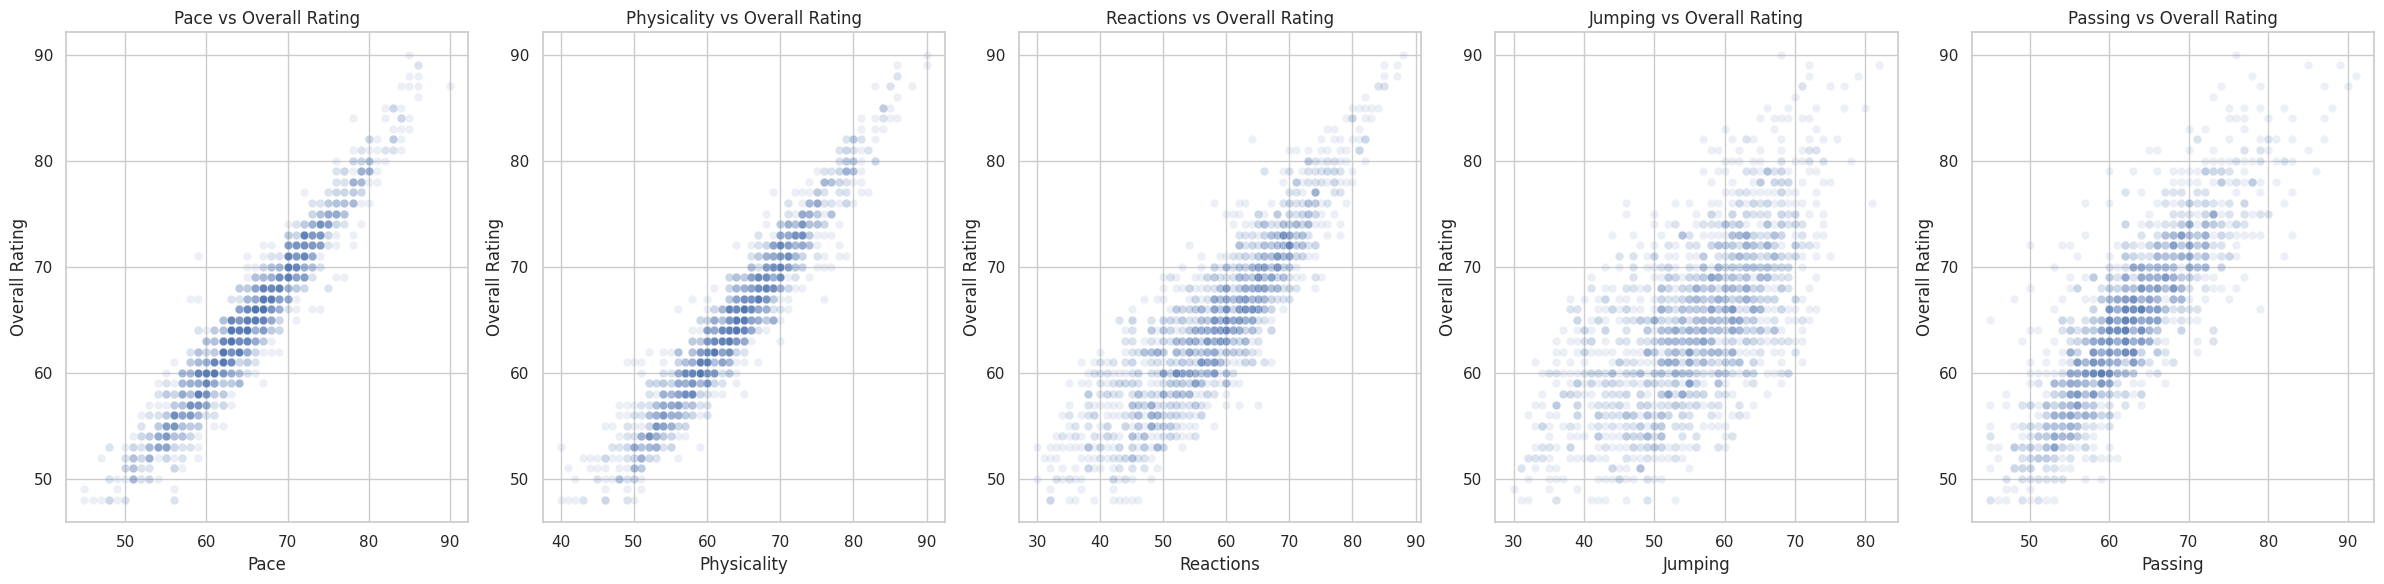

In [32]:
# Select relevant columns for skill ratings and overall rating
skill_columns =[ 'Pace', 'Physicality', 'Reactions', 'Jumping','Passing']
 
overall_rating = goalkeeper_df ['Overall']

# Create scatter plots for each skill rating against the overall player rating
plt.figure(figsize=(24, 6))

for i, skill in enumerate(skill_columns, 1):
    plt.subplot(1, len(skill_columns), i)
    sns.scatterplot(x=goalkeeper_df [skill], y=overall_rating, alpha=0.1)
    plt.title(f'{skill} vs Overall Rating')
    plt.xlabel(skill)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

## Defence Skills VS Overall Rating

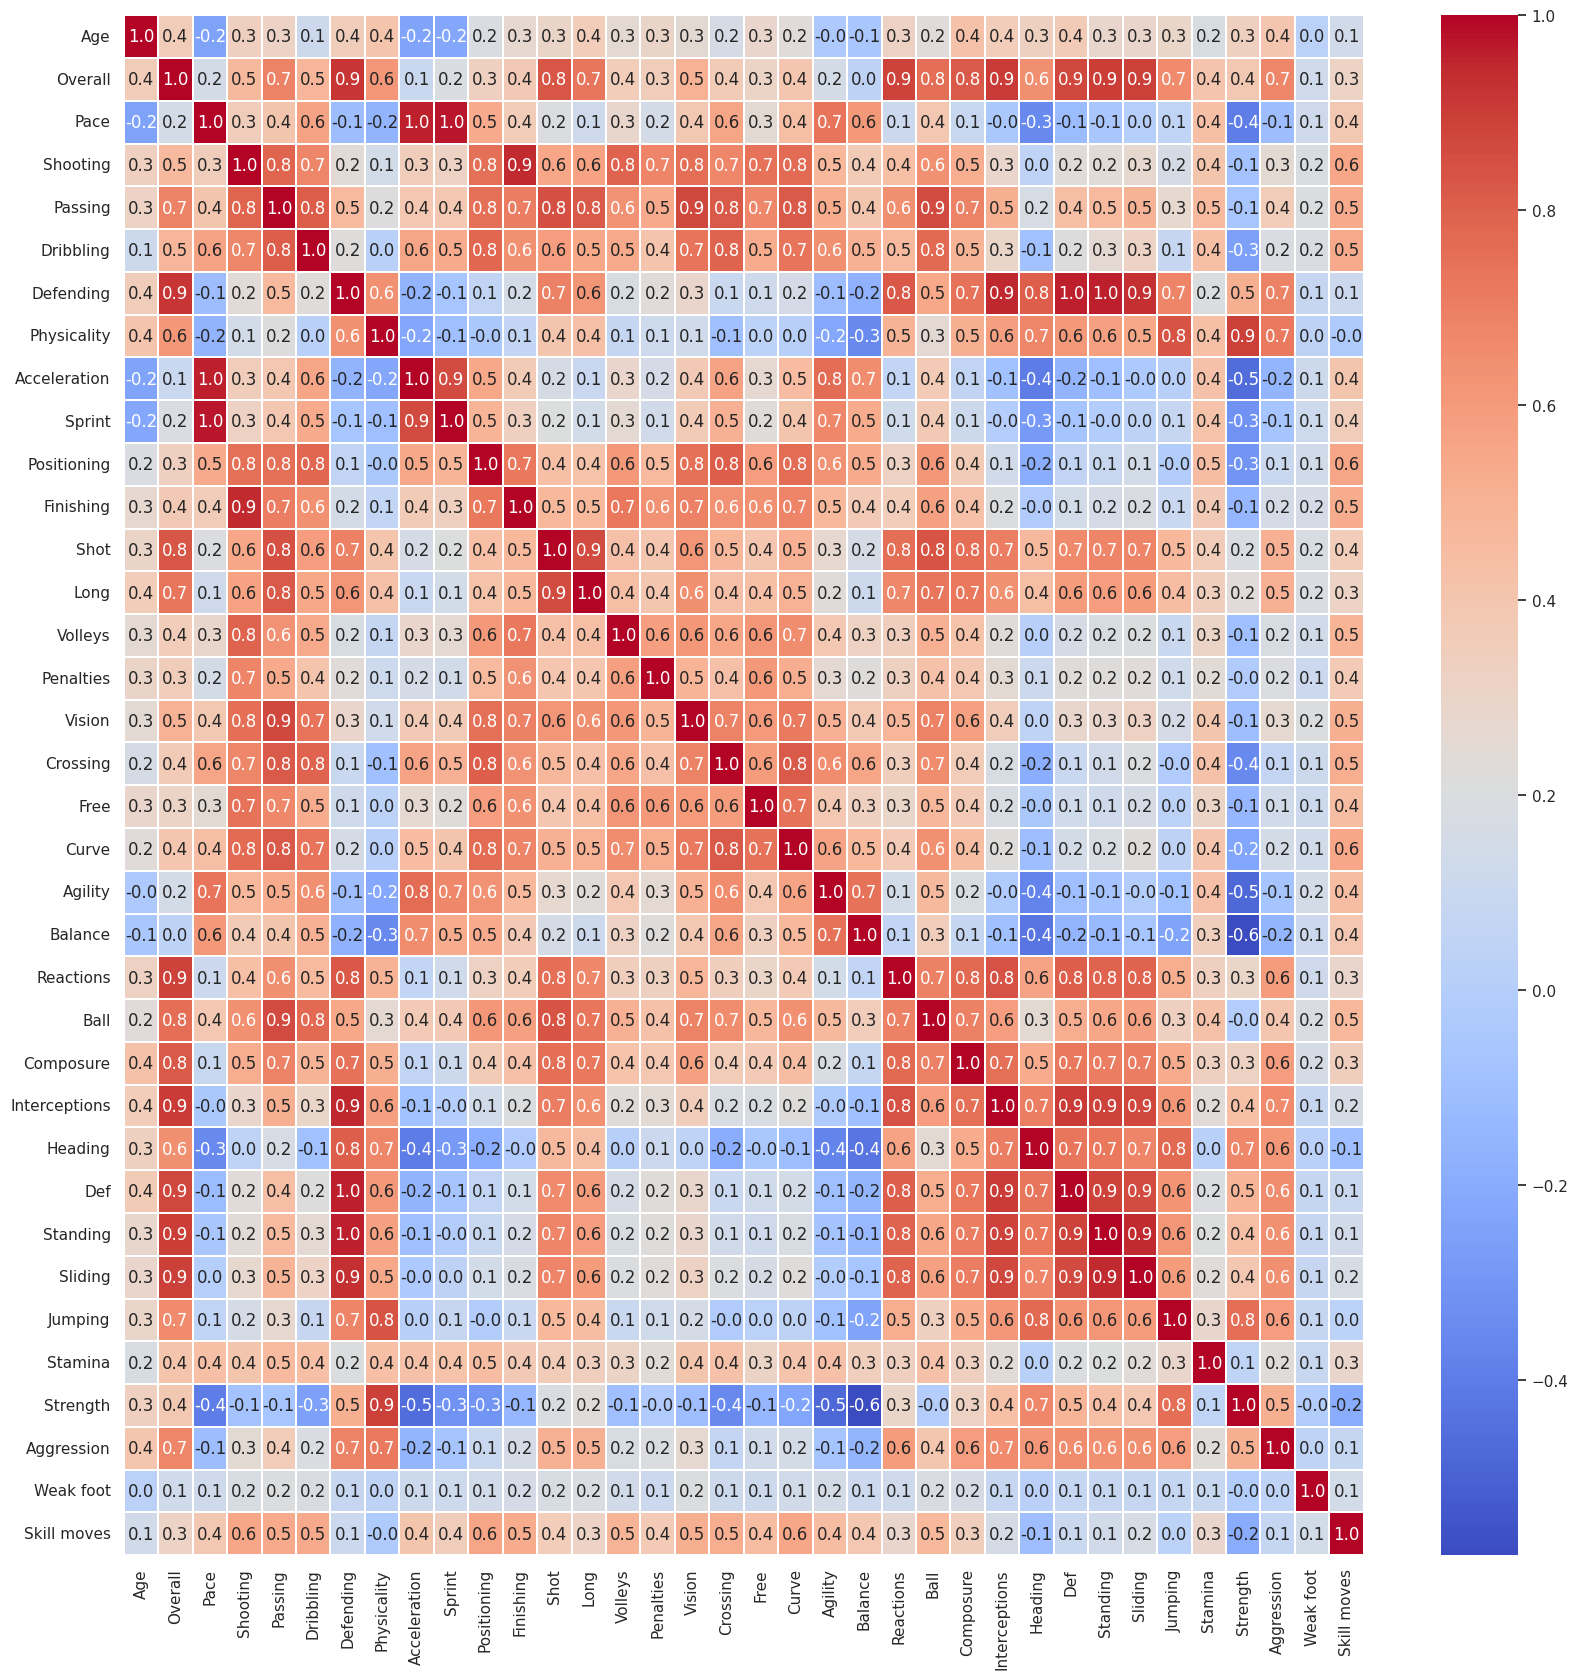

['Overall',
 'Defending',
 'Interceptions',
 'Standing',
 'Sliding',
 'Reactions',
 'Def',
 'Shot',
 'Composure',
 'Ball']

In [33]:
high_overall_correlated_cols(defense_df, plot=True)

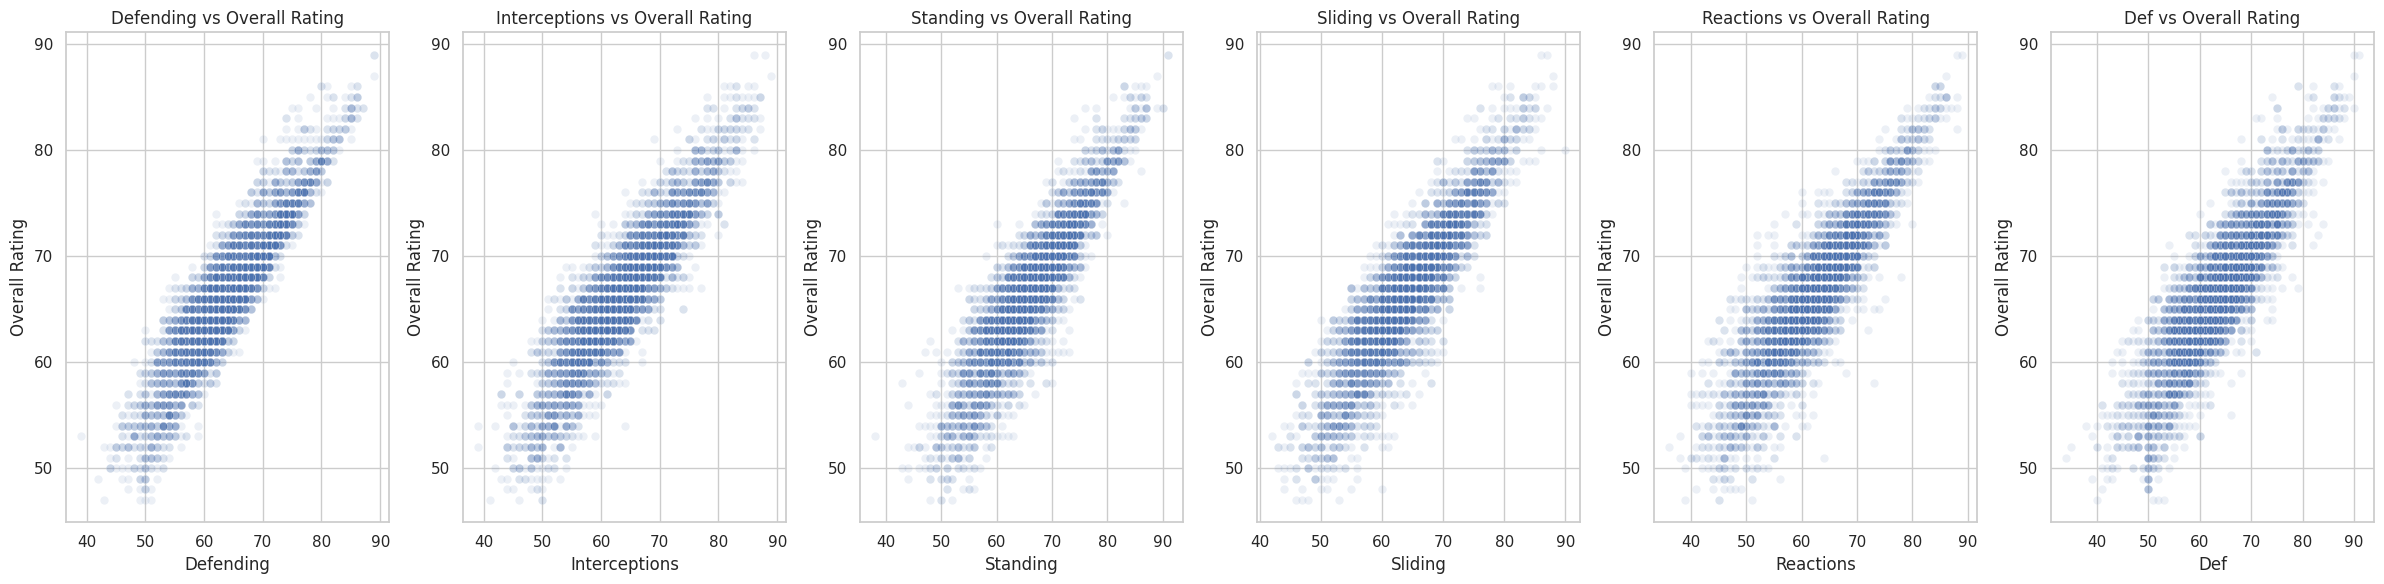

In [34]:
# Select relevant columns for skill ratings and overall rating
skill_columns =['Defending','Interceptions','Standing','Sliding','Reactions','Def']
overall_rating = defense_df['Overall']

# Create scatter plots for each skill rating against the overall player rating
plt.figure(figsize=(24, 6))

for i, skill in enumerate(skill_columns, 1):
    plt.subplot(1, len(skill_columns), i)
    sns.scatterplot(x=defense_df[skill], y=overall_rating, alpha=0.1)
    plt.title(f'{skill} vs Overall Rating')
    plt.xlabel(skill)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

## Midfield Skills VS Overall Rating

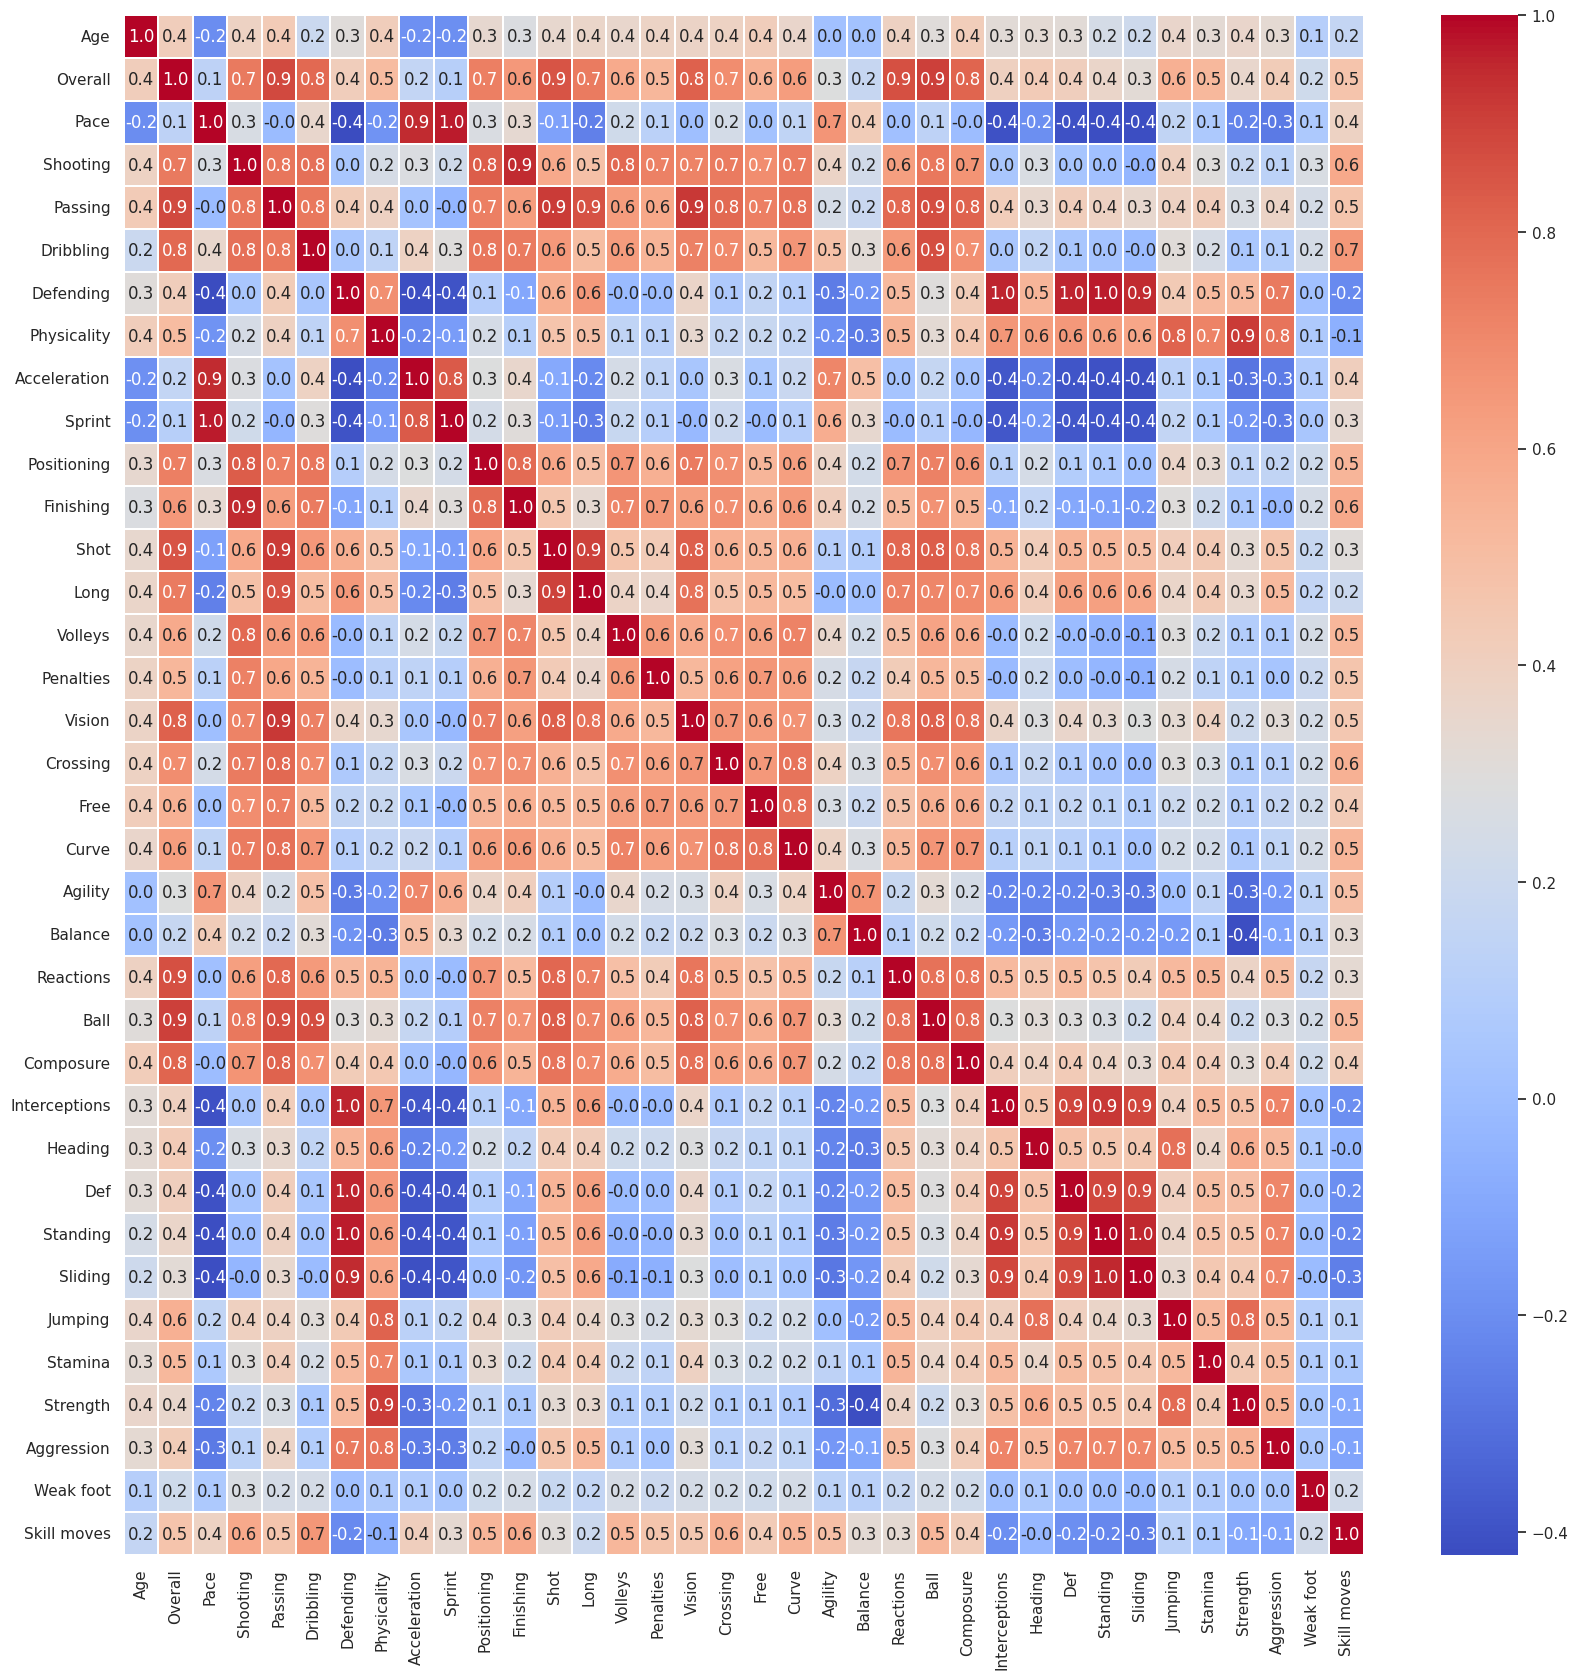

['Overall',
 'Ball',
 'Passing',
 'Reactions',
 'Shot',
 'Vision',
 'Composure',
 'Dribbling']

In [35]:
high_overall_correlated_cols(midfield_df , plot=True)

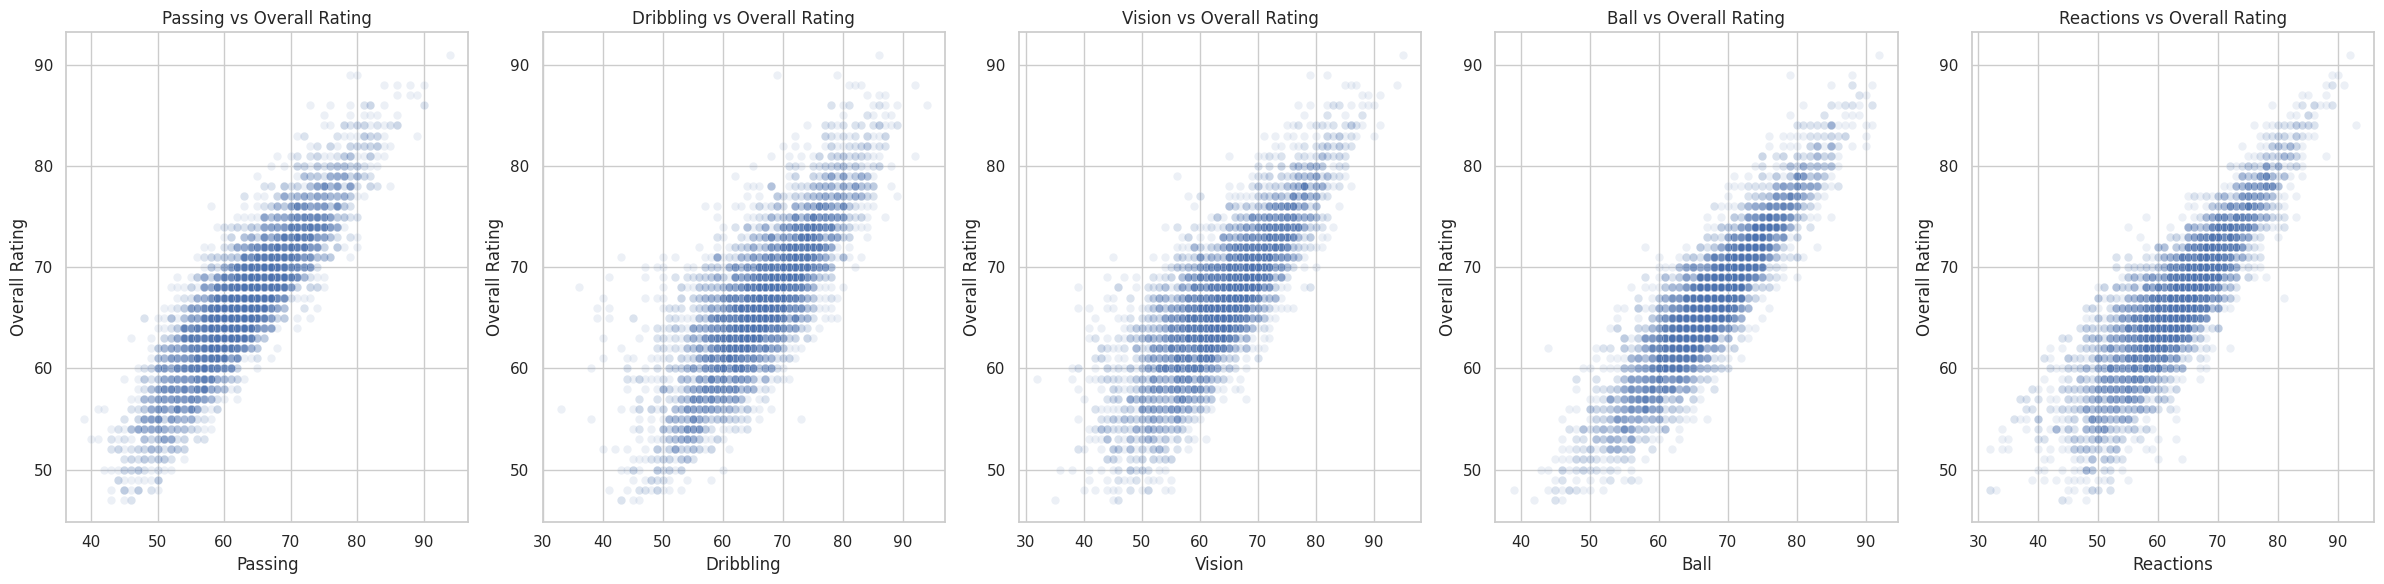

In [36]:
# Select relevant columns for skill ratings and overall rating
skill_columns = [ 'Passing', 'Dribbling', 'Vision', 'Ball','Reactions']
overall_rating = df['Overall']

# Create scatter plots for each skill rating against the overall player rating
plt.figure(figsize=(24, 6))

for i, skill in enumerate(skill_columns, 1):
    plt.subplot(1, len(skill_columns), i)
    sns.scatterplot(x=midfield_df [skill], y=overall_rating, alpha=0.1)
    plt.title(f'{skill} vs Overall Rating')
    plt.xlabel(skill)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()

##  Forward Skills VS Overall Rating

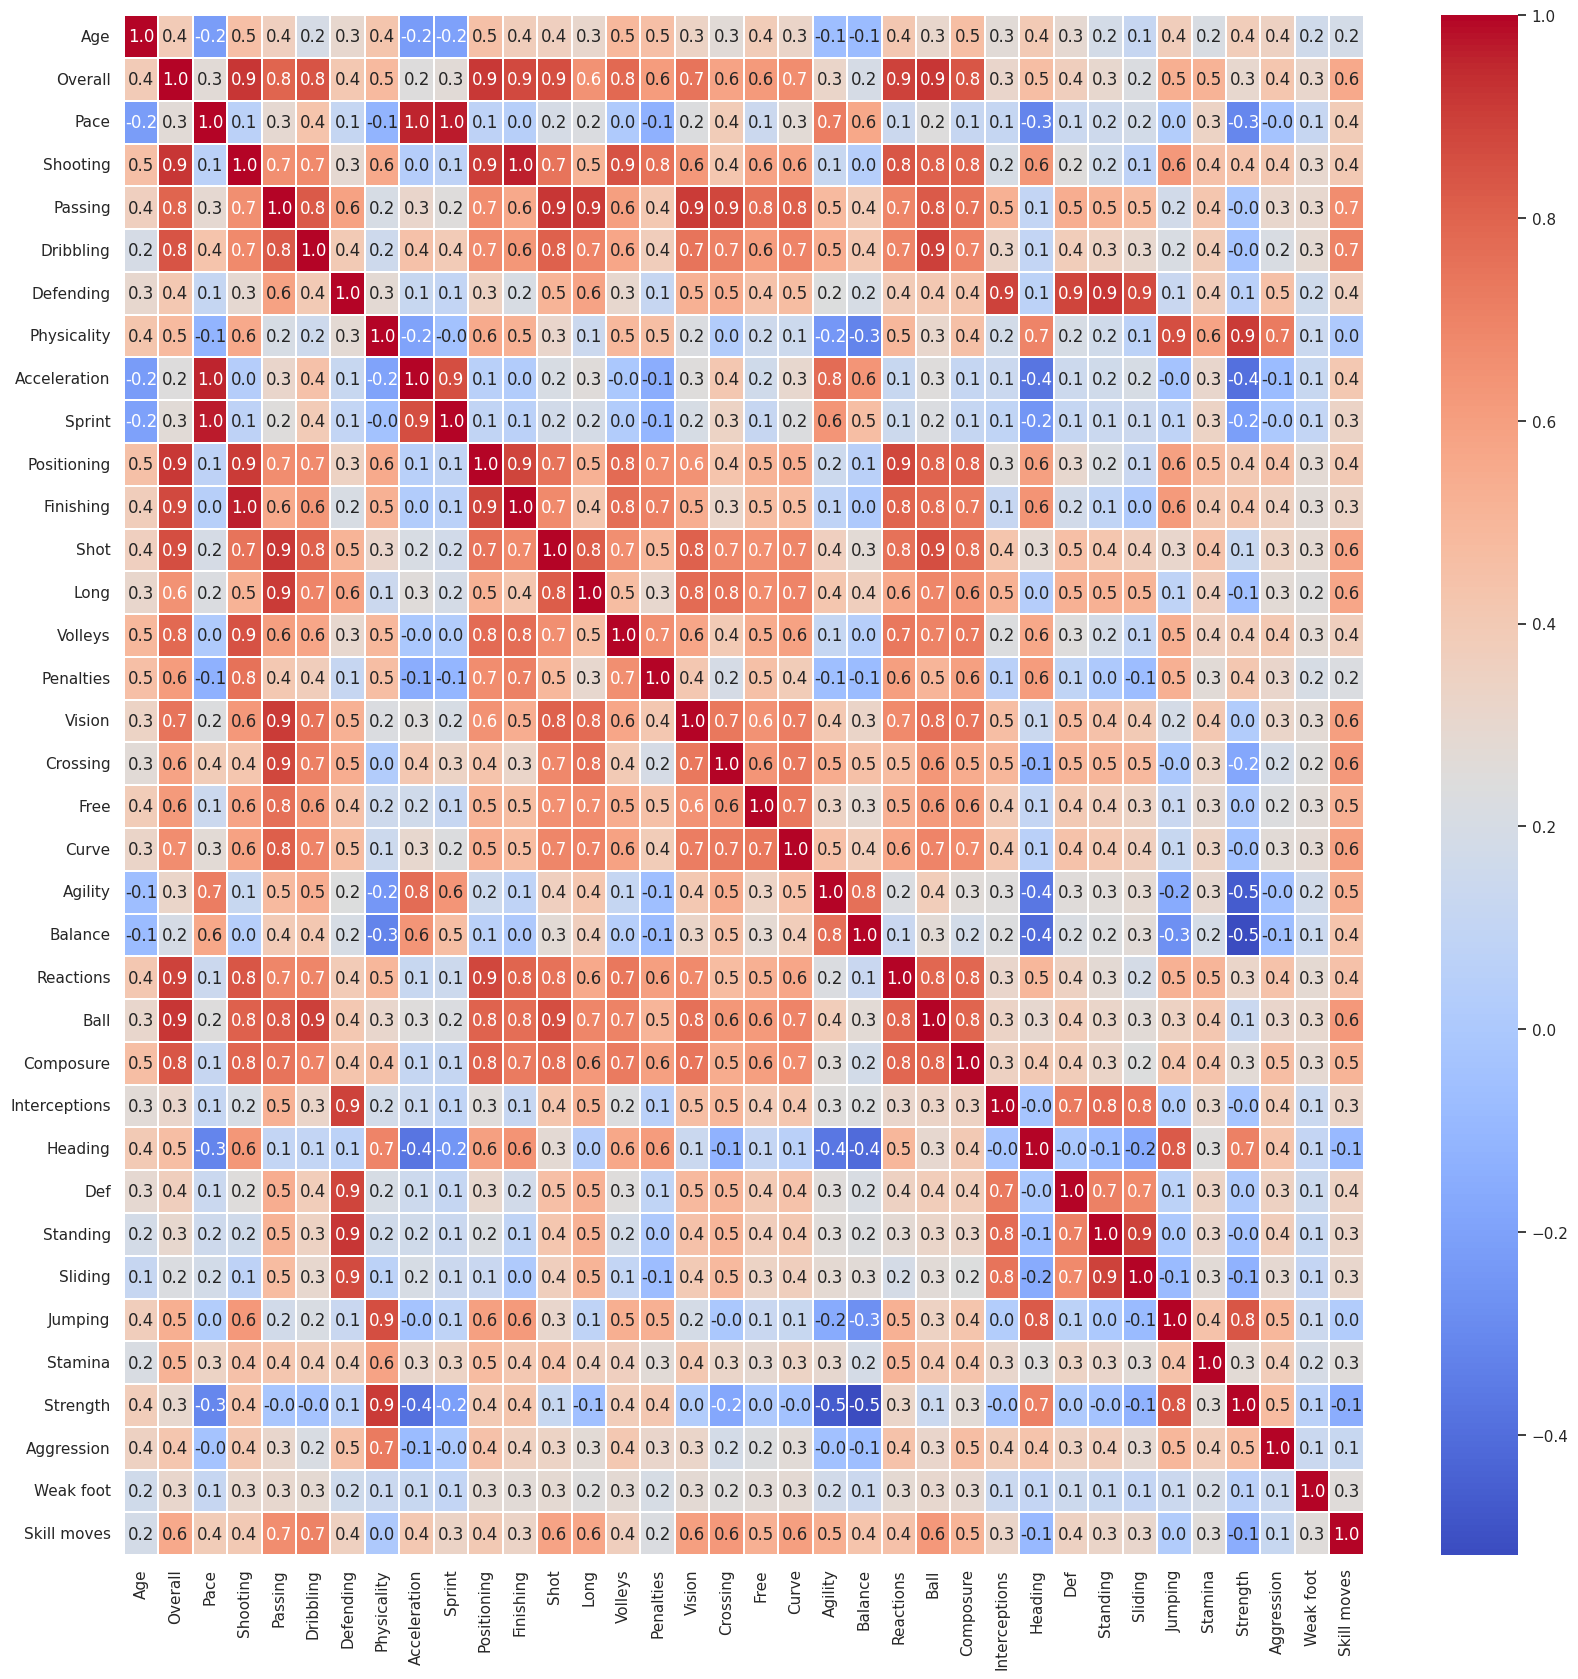

['Overall',
 'Ball',
 'Shooting',
 'Positioning',
 'Reactions',
 'Finishing',
 'Shot',
 'Dribbling',
 'Composure',
 'Passing',
 'Volleys']

In [37]:
high_overall_correlated_cols(forward_df, plot=True)

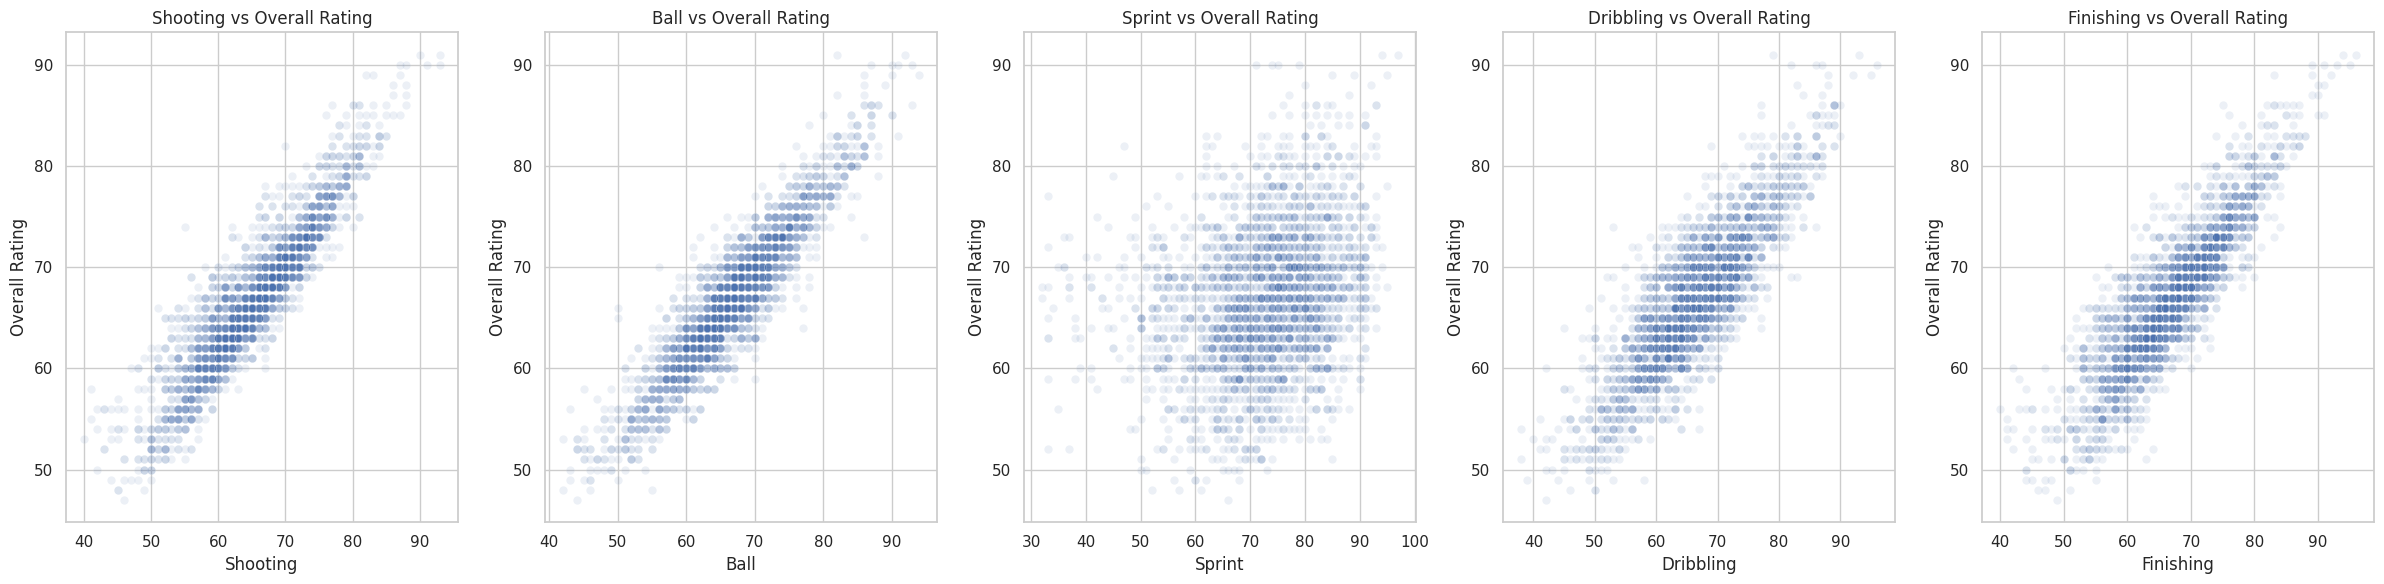

In [38]:
# Select relevant columns for skill ratings and overall rating
skill_columns = ['Shooting','Ball', 'Sprint', 'Dribbling', 'Finishing']
overall_rating = forward_df['Overall']

# Create scatter plots for each skill rating against the overall player rating
plt.figure(figsize=(24, 6))

for i, skill in enumerate(skill_columns, 1):
    plt.subplot(1, len(skill_columns), i)
    sns.scatterplot(x=forward_df[skill], y=overall_rating, alpha=0.1)
    plt.title(f'{skill} vs Overall Rating')
    plt.xlabel(skill)
    plt.ylabel('Overall Rating')

plt.tight_layout()
plt.show()